## Project Introduction

### Problem Definition
Customer churn is a significant challenge for telecommunications companies, including ConnectTel, as it represents the loss of customers to competitors. The costs associated with acquiring new customers often exceed those of retaining existing ones, making it crucial to minimise churn. The ability to accurately predict customer churn can provide ConnectTel with insights into which customers are likely to leave, enabling the company to implement targeted retention strategies.

A churn prediction system will allow ConnectTel to:

- Identify At-Risk Customers: By analysing historical customer data and behavioural patterns, the system can flag customers who are more likely to cancel their service. Early identification enables ConnectTel to focus efforts on retaining these customers before they churn.

- Improve Customer Retention: With timely predictions, ConnectTel can deploy personalised interventions, such as offering discounts, tailored service packages, or improved customer support, to retain high-value customers.

- Optimise Marketing Spend: Instead of casting a wide net with general retention campaigns, ConnectTel can precisely target resources on customers who are likely to churn, maximising the return on investment for retention initiatives.

- Gain Insights into Churn Drivers: The system will reveal the key factors contributing to customer churn, such as dissatisfaction with service quality, pricing issues, or lack of engagement with certain services. This enables ConnectTel to address these root causes and improve customer satisfaction.

- Enhance Long-Term Customer Loyalty: By proactively addressing the needs and concerns of at-risk customers, ConnectTel can strengthen customer relationships and reduce churn rates, thus maintaining a competitive edge in the telecom industry.

Ultimately, the churn prediction system will empower ConnectTel to reduce customer attrition, improve overall profitability, and maintain a strong presence in the highly competitive telecommunications market.

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings("ignore")

## Load Data set

In [2]:
# import dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\10alytics\Capstone Project\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# print the bottom rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# dimensionality (exploring the number of rows and columns)
df.shape

(7043, 21)

In [5]:
# examine the features ( columns )
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# data verification for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Observation
The TotalCharges column is being read as a string (likely due to non-numeric entries), which will need further handling during data preprocessing.

In [7]:
# Numerical and statistical Analysis
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Observation
Detailed analysis of this statistical summary:

1. SeniorCitizen Column:
- It's a binary column (0 or 1) indicating if a customer is a senior citizen or not
- Mean of 0.162147 suggests about 16.2% of customers are senior citizens
- Min of 0 and Max of 1 confirms it's binary
- All percentiles (25%, 50%, 75%) are 0, indicating most customers are not senior citizens

2. Tenure Column:
- Represents how long customers have been with the service (probably in months)
- Ranges from 0 to 72 months (6 years)
- Mean tenure is ~32.37 months
- Standard deviation of 24.59 shows high variability
- Quartiles show:
  * 25% of customers have tenure ≤ 9 months
  * 50% have tenure ≤ 29 months (median)
  * 75% have tenure ≤ 55 months

3. MonthlyCharges Column:
- Shows monthly billing amounts
- Ranges from 18.25 to 118.75
- Mean monthly charge is 64.76
- Standard deviation of 30.09 indicates significant variation in charges
- Quartiles indicate:
  * 25% of customers pay ≤ $35.50
  * 50% pay ≤ 70.35 (median)
  * 75% pay ≤ 89.85

4. General Observations:
- Sample size is 7,043 customers (shown by count)
- There's a good spread of both new and long-term customers
- Monthly charges have a relatively wide range, suggesting different service tiers or packages
- Senior citizens are a minority in the customer base
e aspect of this data in more detail?


In [8]:
# categorical statistical Analysis
df.describe(include = ["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Observation 
- customerID: Each customer has a unique ID (7,043 unique values).
- Gender: There are 3,555 males and 3,488 females.
- Partner: 3,641 customers do not have a partner.
- Dependents: 4,933 customers do not have dependents.
- PhoneService: 6,361 customers have phone service.
- MultipleLines: 3,390 do not have multiple lines.
- InternetService: 3,096 customers use Fiber optic.
- OnlineSecurity, OnlineBackup, DeviceProtection: Most customers do not use these services.
- Contract: 3,875 customers are on Month-to-month contracts.
- PaperlessBilling: 4,171 customers have opted for paperless billing.
- PaymentMethod: The most common method is Electronic check (2,365 customers).
- Churn: 5,174 customers have not churned, while 1,869 have churned.

### Dealing with missing values 

Lets find out if the data has missing values or not so we decide how to handle it

In [9]:
# check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

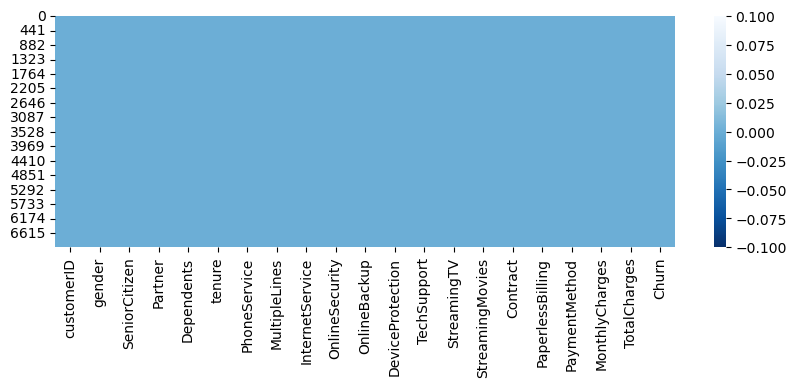

In [10]:
#visualise missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

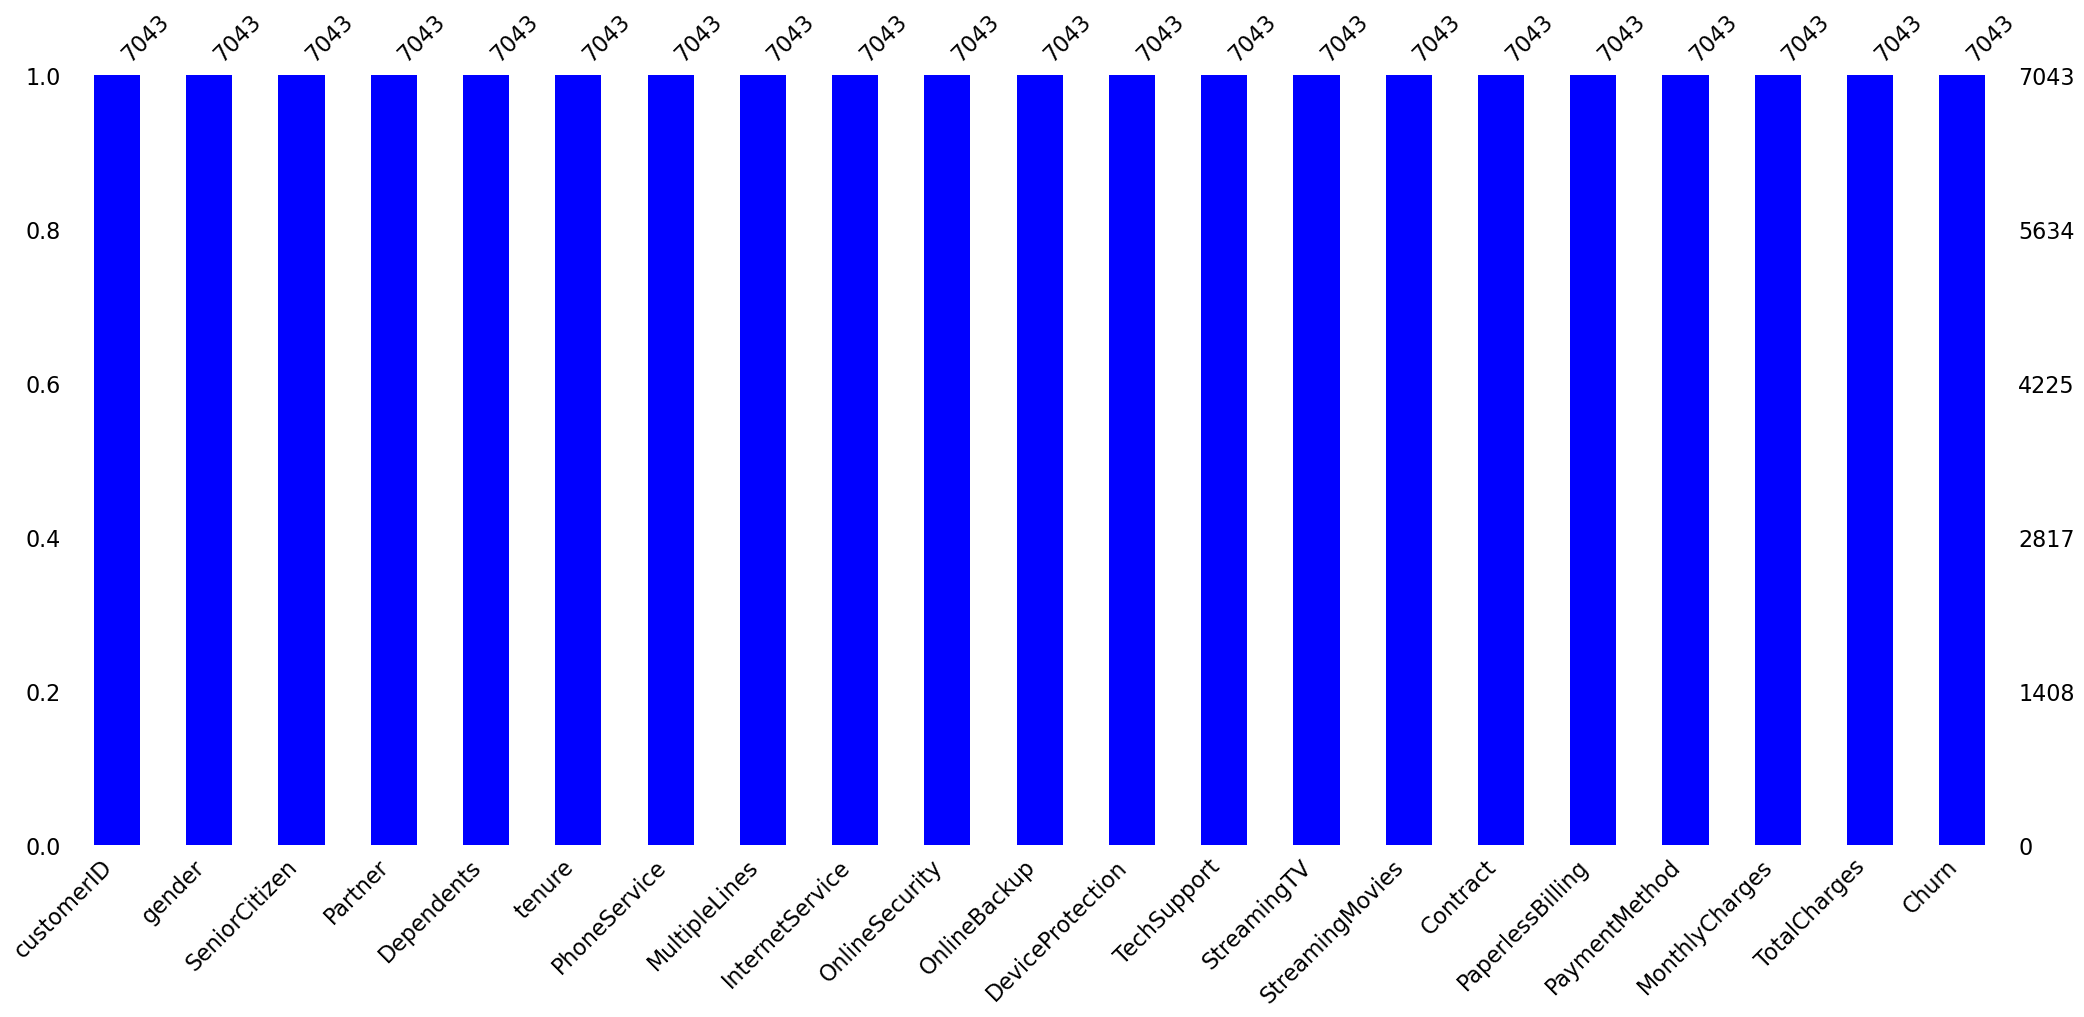

In [11]:
# visualise missing no
msno.bar(df,color="blue");

In [12]:
# check for duplicates
df.duplicated().sum()

0

## Observation
There are  no missing numbers and no duplicated values

# Data Preprocessing
Lets make sure TotalCharges is converted from an object to numerical value 

In [13]:
# Explore TotalCharges column
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
# Detect entries where TotalCharges is either NaN or contains blank values
nan_total_charges = df[df['TotalCharges'].isnull()]

# Display the rows where TotalCharges is NaN
nan_total_charges.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
# Detect rows where TotalCharges is non-numeric
non_numeric_total_charges = df[df['TotalCharges'].str.strip() == '']

# Display the problematic entries
non_numeric_total_charges.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [16]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN (invalid entries become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.TotalCharges.isnull().sum()


11

## Observation 
After converting the feature to numerical value, we can see there are 11 missing values in TotalCharges column. Let's check these records

In [17]:
# Check if any rows have missing 'TotalCharges' after conversion
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges.isna().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


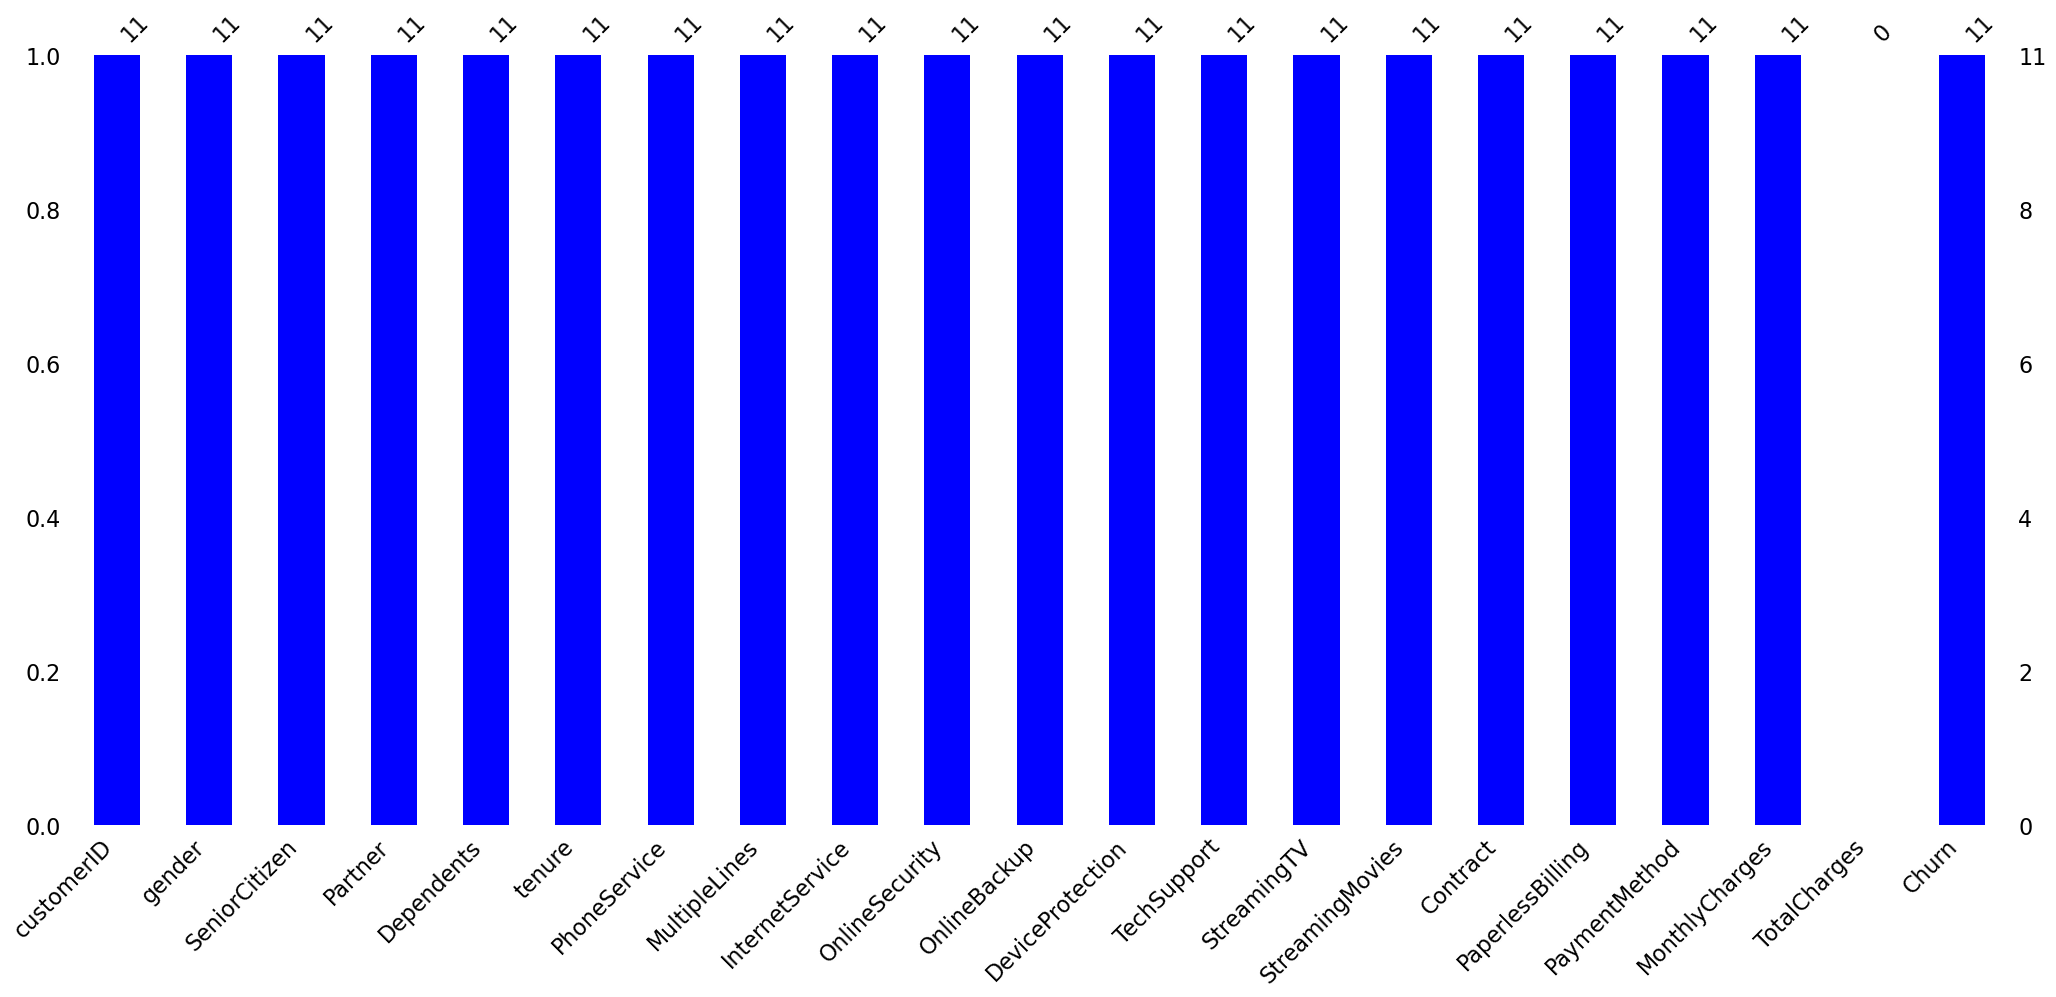

In [18]:

# visualise missing no
msno.bar(missing_total_charges,color="blue");




In [19]:
missing_total_charges.loc[missing_total_charges ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Data Cleaning to handle missing values
This step has to be performed to address the 11 missing data from TotalCharges

In [20]:
# Drop rows where 'TotalCharges' is missing
df = df.dropna(subset=['TotalCharges'])

# Verify the conversion
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [21]:
# data verification for anomalies and data types in TotalCharges After dropping missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Observation 
Non-numeric values in TotalCharges were successfully converted to NaN. After this, 11 rows with missing TotalCharges were identified.
These rows were dropped, and now the dataset contains 7,032 entries.
The TotalCharges column is now a numeric type (float), ready for analysis.

## Exploratory Data Analysis

#### Next step is to divide customers into bins based on tenure 

In [22]:
# Get the max tenure
print(df['tenure'].max()) #72
# Get the max tenure
print(df['tenure'].min()) #72

72
1


In [23]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

# Inspect the churn distribution across tenure groups
churn_by_tenure_group = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

# Display the churn rates for each tenure group
print(churn_by_tenure_group)



Churn               No       Yes
tenure_group                    
1 - 12        0.523218  0.476782
13 - 24       0.712891  0.287109
25 - 36       0.783654  0.216346
37 - 48       0.809711  0.190289
49 - 60       0.855769  0.144231
61 - 72       0.933902  0.066098


In [24]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

## Observations from the Churn Rates by Tenure Group:
High Churn Rate for New Customers (1-12 months):

In the first group (1-12 months), the churn rate is 47.7%, meaning nearly half of the new customers churn within their first year. This is a significant finding and suggests that new customers are the most vulnerable to leaving.

Declining Churn with Increased Tenure:
As customers stay longer, the churn rate drops progressively:
- 13-24 months: Churn drops to 28.7%.
- 25-36 months: Churn further decreases to 21.6%.
- 37-48 months: Churn reduces to 19.0%.
- 49-60 months: Churn declines to 14.4%.
- 61-72 months: The churn rate reaches a low of 6.6%, meaning long-term customers are the least likely to churn.
Loyalty Increases with Time:

The longer customers stay with the service, the less likely they are to leave. This trend is very clear and suggests that customers who remain past the first year are increasingly loyal. After the 24-month mark, the churn rate drops significantly, indicating that retaining customers through the first few years is critical for reducing churn.

Target Retention for New Customers:
The 1-12 months group stands out as a critical segment for targeted retention efforts. Reducing churn in this early stage could have the most impact on improving overall customer retention.
### Recommendations:
- Focus on Early Customer Retention: Initiatives like onboarding improvements, early engagement programs, and targeted promotions for customers in their first year can help reduce churn.
- Reward Long-Term Customers: Offering loyalty programs to long-term customers (e.g., those over 24 months) can further strengthen their relationship with the company and reduce the already low churn rate.

### Univariate Analysis
Univariate Analysis involves analysing the distribution and summary statistics of individual variables/Column feature . Numerical Columnfeature = Numerical Visualization techniques . Categorical Columnfeature = Categorical Visualization Technique

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Categorical Data Visualization

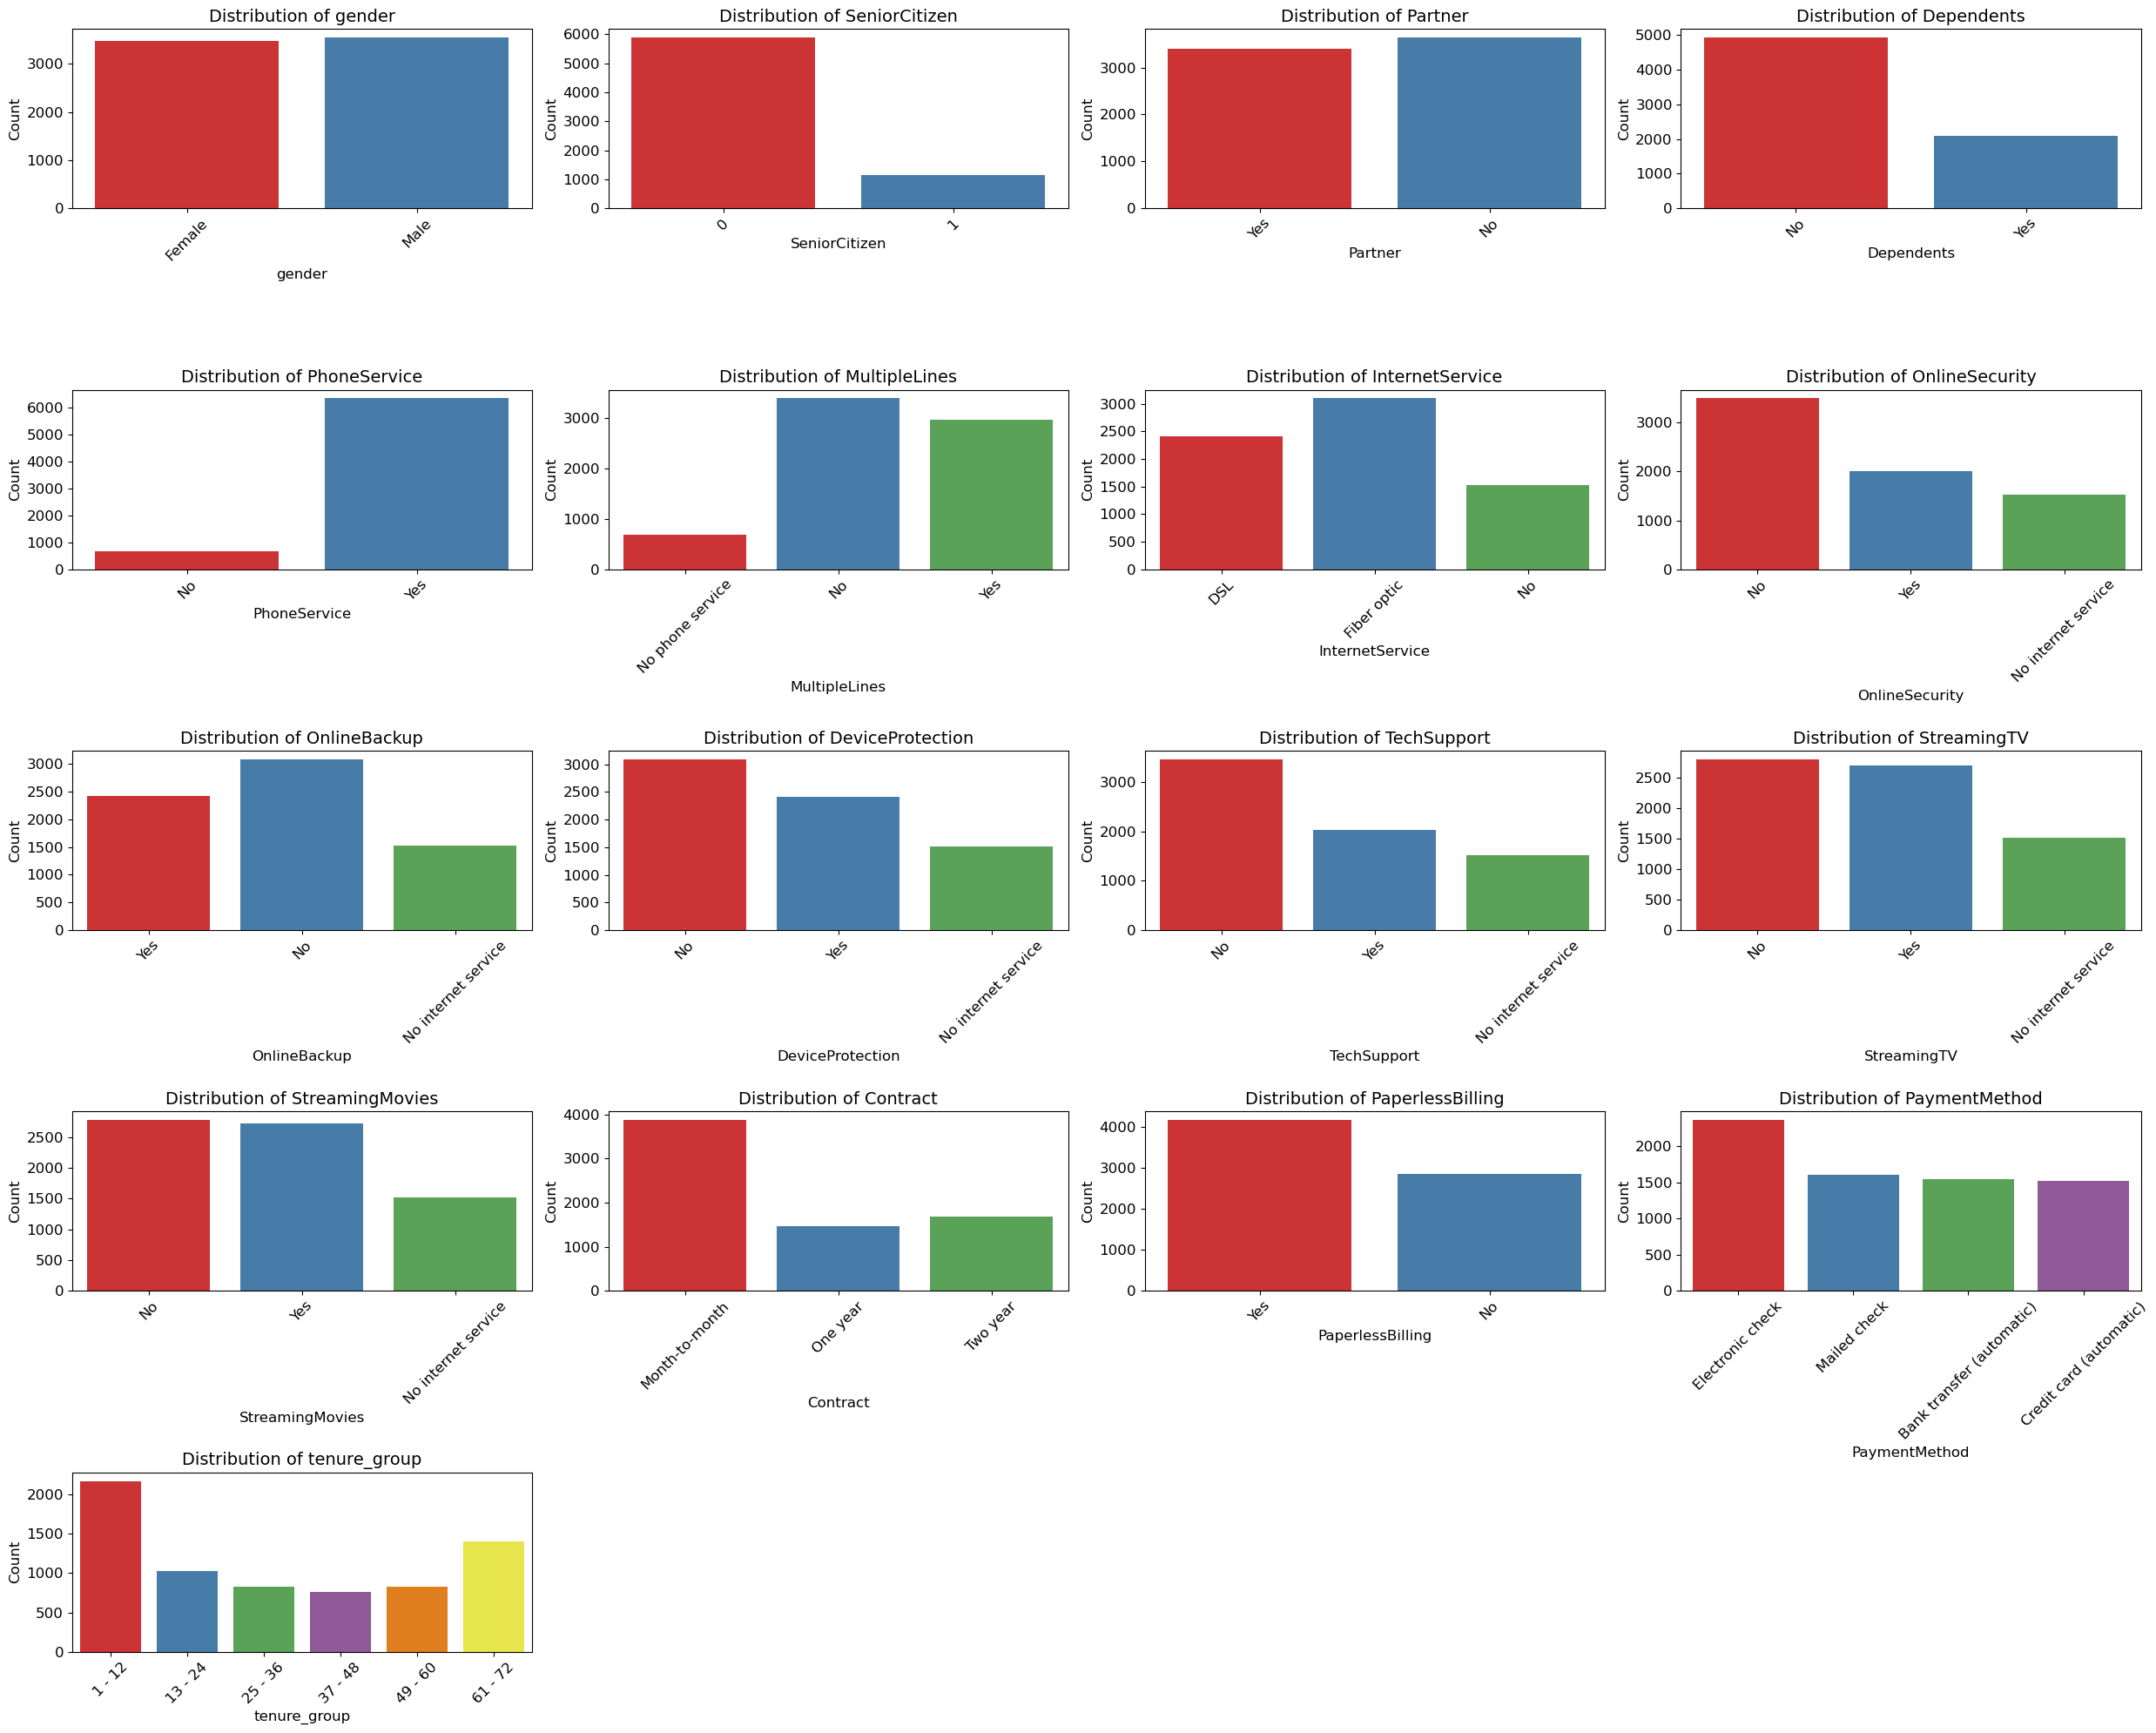

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



# List of all categorical features for univariate analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

# Set up the plot grid
plt.figure(figsize=(25, 20))

# Create bar plots for each categorical feature 
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)  # layout
    sns.countplot(data=df, x=feature, palette='Set1')  
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()


## Observation
1. Gender:
The distribution between Male and Female customers is almost evenly split.
No strong skew or imbalance in gender representation is observed.

#### Insight:
Gender alone may not provide a significant indication of churn risk, as the distribution is fairly even.

2. SeniorCitizen:
A significant majority of the customers are non-senior citizens (0), while a smaller portion are senior citizens (1).

#### Insight:
Since the senior citizen group is relatively smaller, it might be interesting to analyse how they relate to churn, as senior citizens may have different service preferences or requirements.

3. Partner:
Most customers do not have a partner (No).
The distribution shows that a slightly larger portion of the customer base consists of people without a partner.

#### Insight:
Having a partner might influence service usage and customer retention, potentially leading to lower churn for partnered customers.

4. Dependents:
A majority of customers do not have dependents, with a smaller group having dependents.
This skew suggests that most customers may be using the service for individual purposes rather than family use.

#### Insight:
Customers with dependents may engage more with family-oriented services, possibly influencing retention and churn behaviour.

5. PhoneService:
The vast majority of customers have PhoneService.
Very few customers have opted out of this service.

#### Insight:
Since most customers already have PhoneService, this feature may not have a strong influence on churn prediction by itself. Additional services could play a bigger role in customer retention.

6. MultipleLines:
A majority of customers either have no multiple lines or have multiple lines, with a near even split between the two.

#### Insight:
Offering discounts or promotions on multiple lines could potentially encourage retention, especially for customers who might consider adding more services.

7. InternetService:
Fiber optic service is the most common, followed by DSL and a small portion with no internet service.

#### Insight:
The high adoption of fiber optic could suggest competition or higher satisfaction, but its impact on churn could depend on service quality and price.

8. OnlineSecurity:
A large portion of customers have no online security service, followed by those who subscribe to it.

#### Insight:
Offering bundled services or incentivising customers to add security services might reduce churn, as customers who invest in multiple services may be more likely to stay.

9. OnlineBackup:
The distribution shows that many customers do not have online backup, with a smaller portion opting for it.

#### Insight:
Offering promotions for online backup services or bundling them with other services could improve customer engagement and retention.

10. DeviceProtection:
A majority of customers do not have device protection, though a reasonable portion of the customer base does.

#### Insight:
Encouraging the adoption of device protection plans may increase customer loyalty and reduce churn, as it adds value to their service package.

11. TechSupport:
A large portion of customers do not have tech support, with a smaller but notable segment using it.

#### Insight:
Promoting tech support could enhance the user experience, especially for older or less tech-savvy customers, potentially reducing churn rates.

12. StreamingTV and StreamingMovies:
The distribution for both features shows that customers are relatively evenly split between subscribing and not subscribing to streaming services.

#### Insight:
Offering bundled packages that include streaming services may appeal to customers who value entertainment options, which can improve retention and customer satisfaction.

13. Contract:
Month-to-month contracts are the most common, followed by One year and Two year contracts.

#### Insight:
Customers on longer contracts are more likely to stay with the service, and encouraging customers to switch to longer contracts (e.g., via discounts or promotions) could reduce churn.

14. PaperlessBilling:
More customers have opted for paperless billing, while a smaller portion still receives physical bills.

#### Insight:
Paperless billing may appeal to more tech-savvy or younger customers, who may also be more inclined to churn. Retaining this segment might require offering incentives tied to environmental or convenience benefits.

16. PaymentMethod:
Electronic check is the most common payment method, followed by other forms like Credit card and Bank transfer.

#### Insight:
Payment method could be a predictor of churn, particularly if some methods are associated with ease of cancellation or lower commitment (e.g., electronic checks).

15. Tenure Group:
The 1-12 months group is the largest, with tenure decreasing as the tenure group increases. Fewer customers remain with the service for longer periods.

#### Overall Insight:
Retaining customers within the first year is crucial, as they are at the highest risk of churn. Efforts should focus on improving satisfaction and offering incentives during the early stages of their subscription.
Several features show an uneven distribution, particularly Contract, Tenure, and Service Adoption (e.g., OnlineBackup, DeviceProtection, TechSupport), which may have a significant impact on churn prediction.
Features like gender and PhoneService, which are more evenly distributed, may have less of a direct effect on churn.
Services such as streaming and security options could serve as leverage for increasing customer engagement and reducing churn by offering bundled packages.

### Numerical Data Visualisation


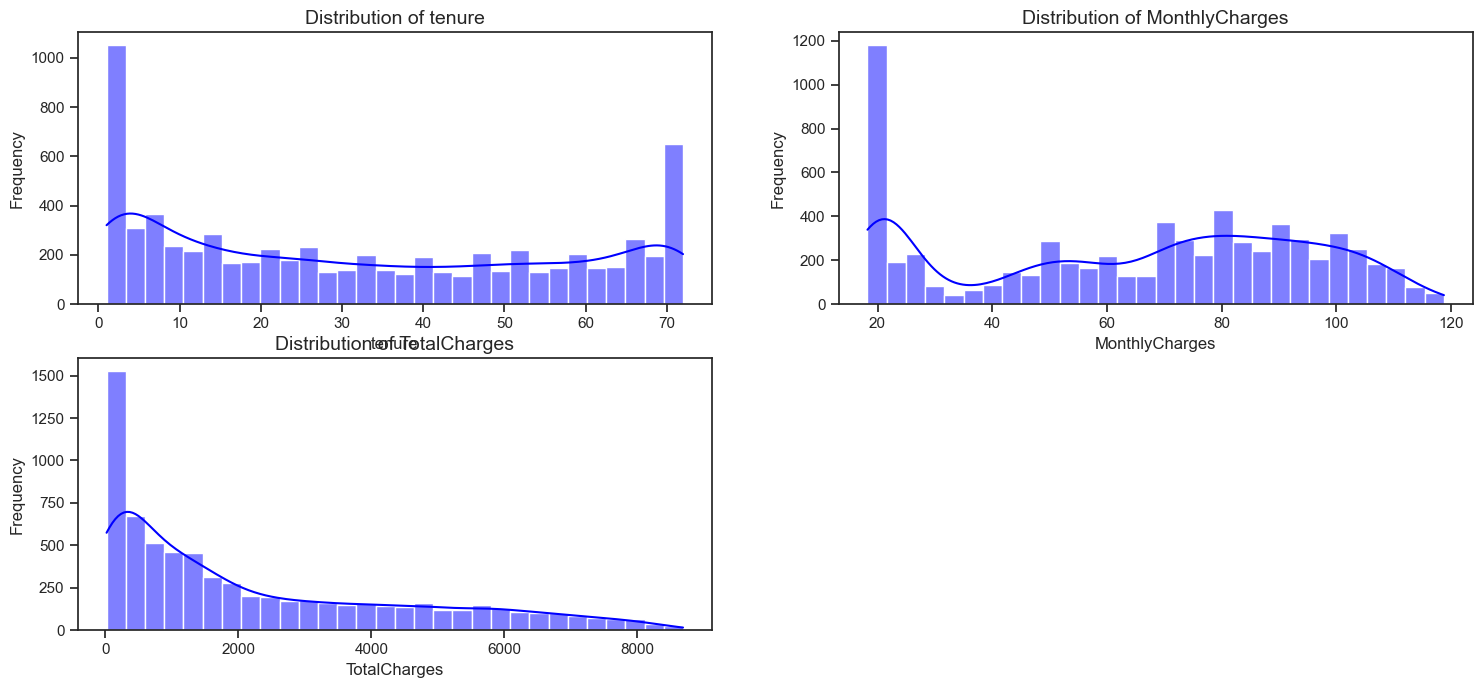

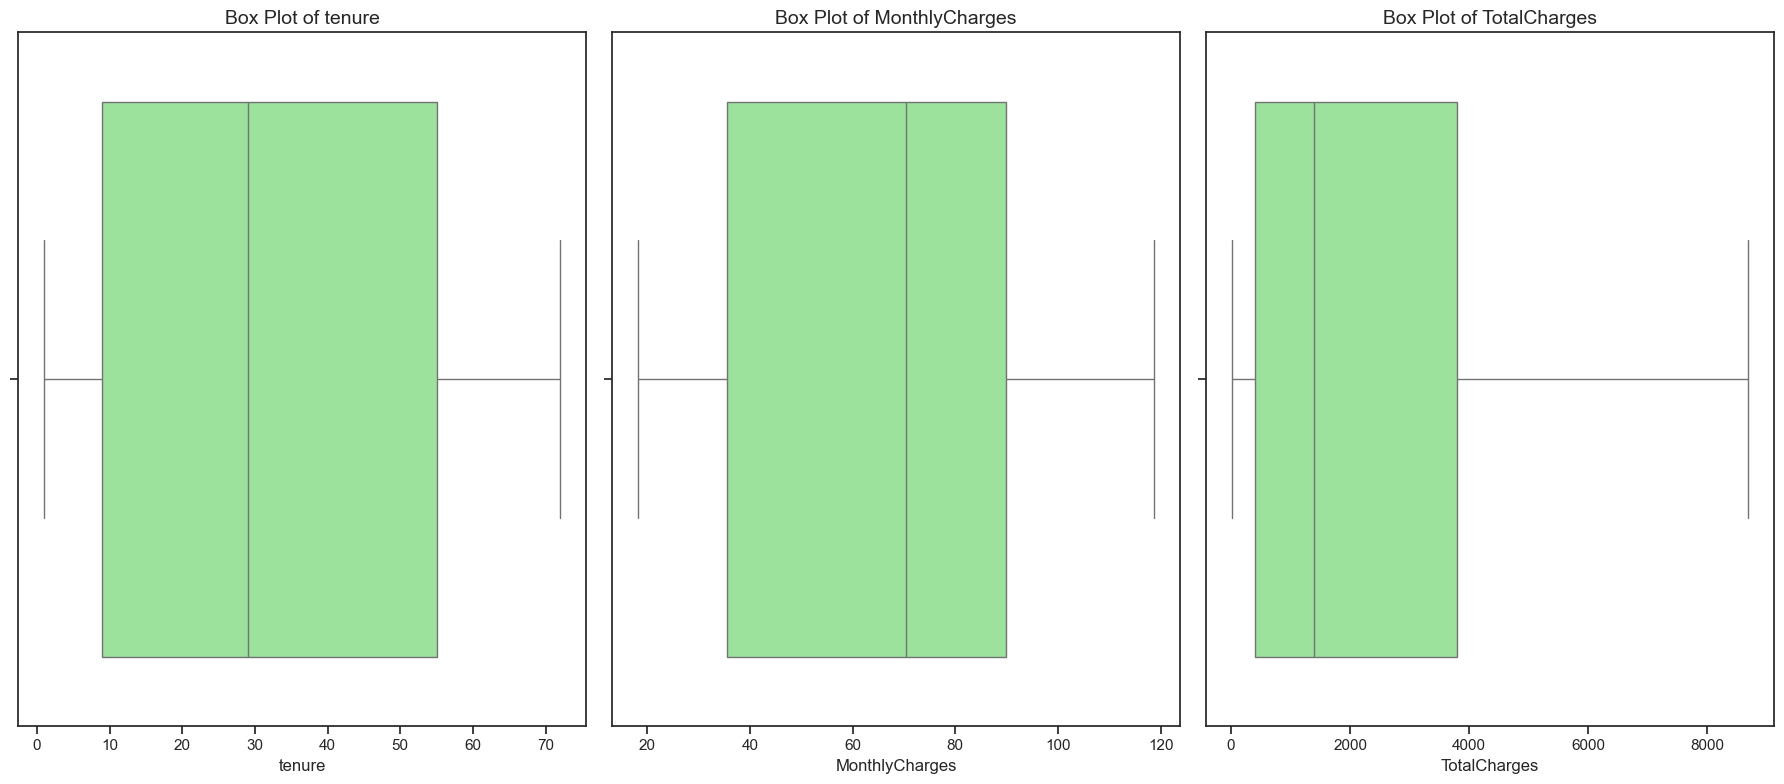

In [27]:

# Set up seaborn style with no gridlines
sns.set(style="ticks")  

# List of numerical features for univariate analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the plot grid for histograms and KDE plots 
plt.figure(figsize=(18, 12))

# Histograms and KDE plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Set up the plot grid for box plots 
plt.figure(figsize=(18, 8))

# Create box plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=feature, color='lightgreen')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


## Observations
1. Tenure:
- From Histogram and KDE Plot:
The tenure distribution shows that a large number of customers have short tenure, concentrated around 1-10 months.
There is another slight increase in the number of customers around the 70-month mark, suggesting long-term customers who remain with the service.
The distribution is bimodal, indicating two distinct groups: new customers and long-term customers.
- From Box Plot:
The box plot confirms that tenure has a wide spread, from 1 to 72 months.
The median tenure is around 30 months, suggesting that half of the customers have been with the service for fewer than 30 months.
There are no significant outliers, meaning most customers fit within the expected range of tenure.
#### Insights:
Retention Strategies: Since many customers leave within the first 10 months, targeting this group with retention efforts (e.g., discounts, better service) could be valuable.
Loyalty Programs: Long-term customers around the 70-month mark may be more loyal, and recognising or rewarding these customers can strengthen retention.

2. MonthlyCharges:
- From Histogram and KDE Plot:
The MonthlyCharges distribution shows that most customers are clustered around 20-100 units of charges, with fewer customers paying the highest charges.
There is a significant concentration of customers at the lower end (around 20-30), suggesting that many customers may be on more basic or discounted plans.
The distribution is slightly right-skewed, meaning there are some customers paying very high charges, though they are less frequent.
- From Box Plot:
The box plot shows the median monthly charge is around 60-65 units.
There is a slight skew in the data, with a few customers paying much higher monthly charges (potential outliers or premium customers).
The spread suggests there is significant variability in the pricing structure, which may indicate a wide variety of service plans.
#### Insights:
Pricing Strategy: The right skew and high variance indicate that customers are on widely different plans. This opens up opportunities for targeted pricing strategies to encourage upgrades for low-paying customers or discounts to retain high-paying customers.
Upselling Opportunities: There is room to encourage customers in the low to mid-tier (20-40 units) to move to higher plans by offering value-added services or promotions.

3. TotalCharges:
- From Histogram and KDE Plot:
The TotalCharges distribution has a strong right skew, meaning most customers have low accumulated total charges (likely due to short tenure), while a smaller number of customers have very high total charges (long-tenure customers).
Many customers fall between 0 and 2000 units of total charges, reflecting the fact that many customers have been with the service for only a short period.
- From Box Plot:
The median TotalCharges is around 2000-2500 units, indicating that many customers have moderate accumulated charges.
The right skew is very clear in the box plot, with a few customers having much higher total charges, which likely corresponds to long-tenure customers who have been with the service for many years.
There are a few potential outliers in terms of very high total charges, but this is expected with long-term customers.
#### Insights:
Customer Retention: As total charges accumulate over time, retaining long-term customers becomes crucial, especially those with higher total charges.
Targeting Short-Tenure Customers: The high concentration of low total charges reinforces the need to target new customers (who haven't accumulated many charges yet) with retention strategies, as they are at higher risk of churn.

## Overall Insights:
* New Customers at Risk: Many customers have short tenure and low total charges, making them prime candidates for churn. Efforts should focus on improving early retention to prevent them from leaving within the first 10 months.
* High-Tier Customers: The right skew in MonthlyCharges and TotalCharges suggests that premium customers (those paying higher charges) are fewer but valuable. Special attention should be given to retaining these high-value customers through loyalty programs or exclusive services.
* Pricing Strategy: There is significant variability in MonthlyCharges, opening opportunities for upselling or offering better deals to low- and mid-tier customers to upgrade their plans.


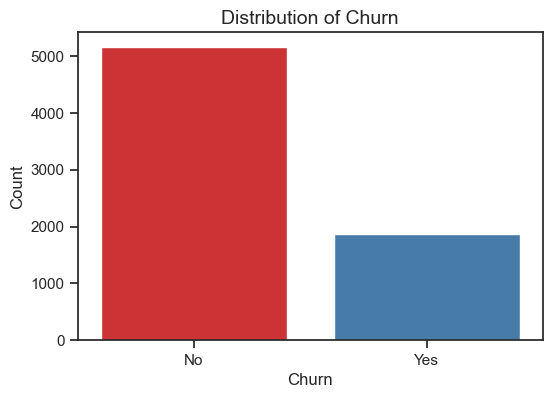

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [28]:

# Plot the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set1')
plt.title('Distribution of Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of churned and non-churned customers
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)


In [29]:
df.Churn.value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

## Observation 
The data is highly inbalanced, we might use class weight during machine learning or upsample the data

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Bivariate Analysis

### Bivariate analysis for categorical variables

In [31]:
# Select all columns with categorical data types (object or category)
categorical_df = df.select_dtypes(include=['object', 'category'])

# Check the columns selected as categorical
print("Categorical Variables in categorical_df:")
print(categorical_df.columns)



Categorical Variables in categorical_df:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'tenure_group'],
      dtype='object')


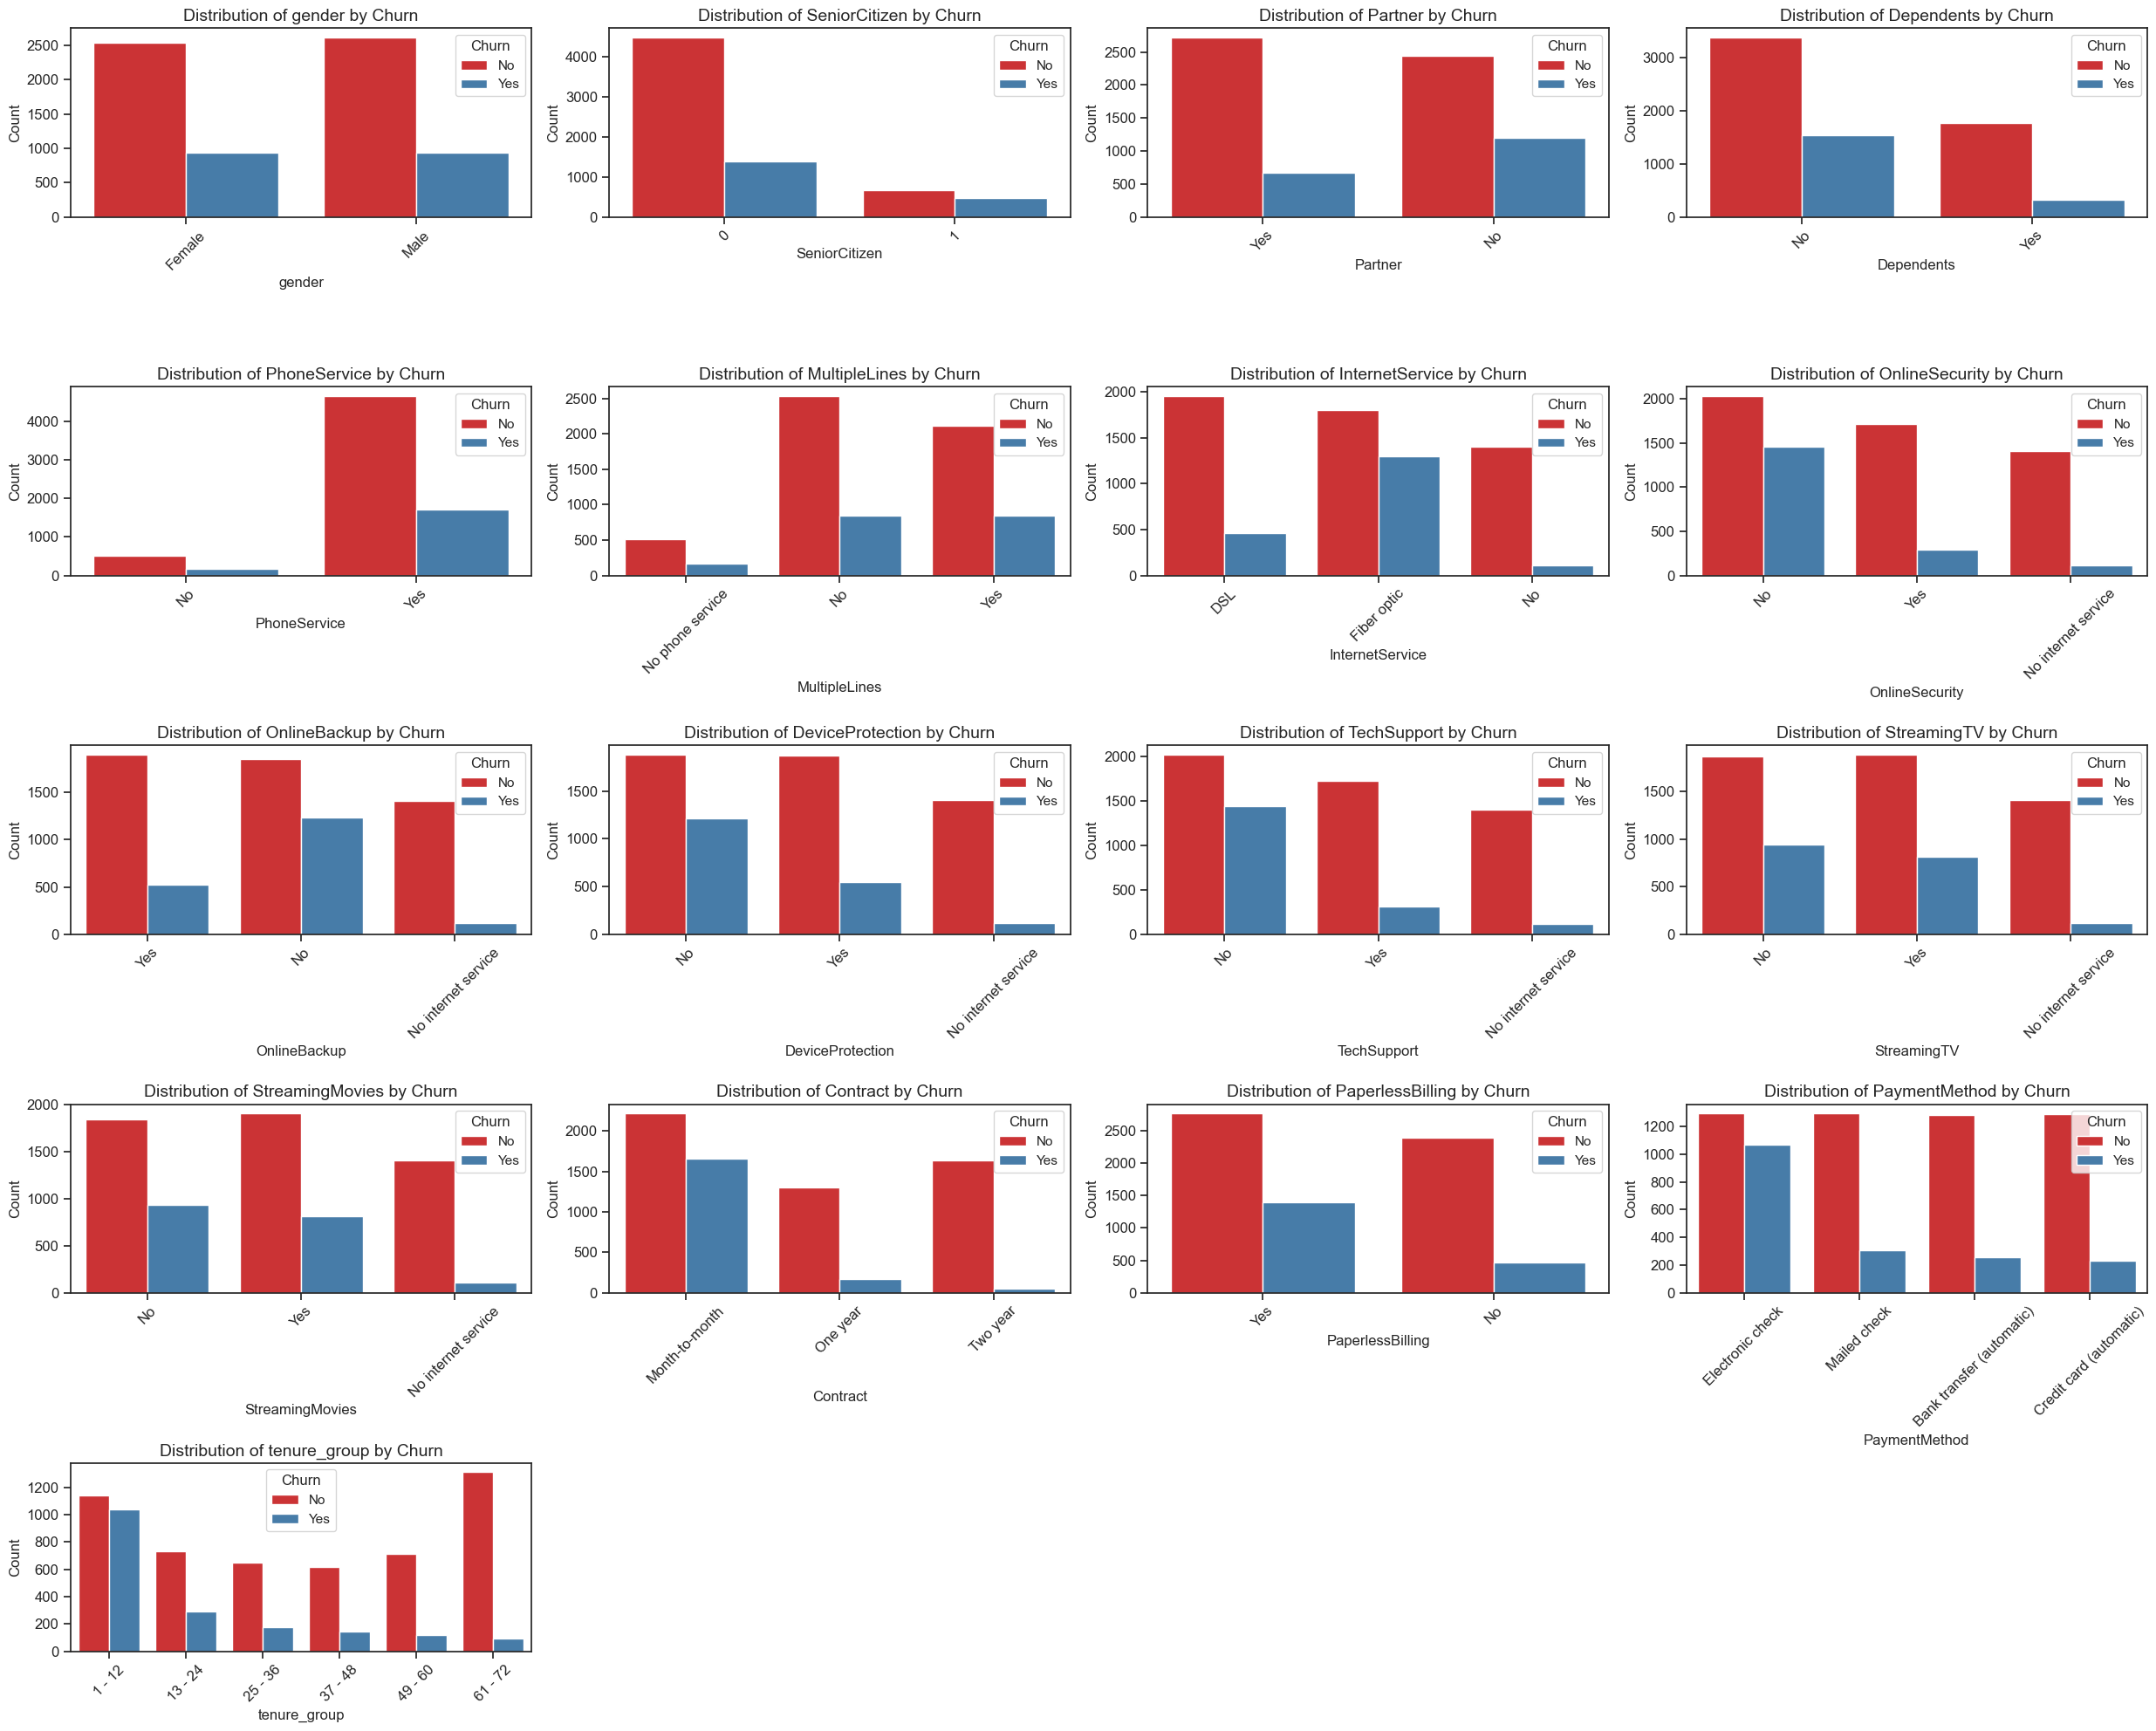

In [32]:

# List of all categorical features including tenure_group for univariate analysis
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

# Set up the plot grid
plt.figure(figsize=(25, 20))

# Create bar plots for each categorical feature with Churn as hue
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i) 
    sns.countplot(data=df, x=feature,hue='Churn', palette='Set1')  
    plt.title(f'Distribution of {feature} by Churn', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

## Observations

1. Gender:
There is no significant difference in the churn rates between Male and Female customers.
Both genders seem to have roughly similar churn behaviour, suggesting gender is not a strong predictor of churn.
2. SeniorCitizen:
Senior citizens (1) have a noticeably higher churn rate compared to non-senior citizens (0).
This indicates that age could play a role in customer retention, with senior citizens being more likely to churn.
3. Partner:
Customers who do not have a partner (No) are more likely to churn than those with a partner (Yes).
Having a partner seems to contribute to customer retention, possibly due to shared service usage or bundled family plans.
4. Dependents:
Similar to the partner variable, customers without dependents (No) have a higher churn rate than those with dependents.
This suggests that family or dependent usage might positively influence retention.
5. PhoneService:
There isn’t a significant difference between churn and non-churn customers based on whether they have phone service.
Most customers have PhoneService, and this feature alone may not strongly influence churn decisions.
6. MultipleLines:
Customers with MultipleLines tend to churn slightly more than those without, though the difference is not very large.
Offering additional lines may not be a strong factor in reducing churn.
7. InternetService:
Fiber optic customers have a higher churn rate compared to DSL and customers with no internet service.
DSL customers churn the least, indicating that perhaps the high competition in fiber optic offerings leads to more customer switching.
8. OnlineSecurity and OnlineBackup:
Customers who do not subscribe to these services are more likely to churn.
Offering or incentivising online security and backup services may help reduce churn by increasing customer engagement.
9. DeviceProtection and TechSupport:
Customers without DeviceProtection and TechSupport are more likely to churn compared to those who subscribe to these services.
Customers who are more engaged with additional support services appear to have higher retention.
10. StreamingTV and StreamingMovies:
Interestingly, customers with StreamingTV and StreamingMovies subscriptions seem to have a slightly lower churn rate than those without.
Offering bundled entertainment services may be an effective strategy to reduce churn.
11. Contract:
Month-to-month customers have a much higher churn rate compared to those on One year or Two year contracts.
Locking customers into longer-term contracts significantly reduces churn, making this one of the strongest predictors of retention.
12. PaperlessBilling:
There is a slight difference, with customers who opt for paperless billing being more likely to churn.
This may reflect a preference for digital services among more transient customers who are less likely to remain long-term.
13. PaymentMethod:
Electronic check users have a higher churn rate compared to other payment methods like Credit card or Bank transfer.
The ease of payment or payment method convenience might influence customer retention, with electronic check users potentially having a higher churn risk.
14. Tenure Group:
The 1-12 month group has a significantly higher churn rate compared to customers with longer tenures.
As tenure increases, churn decreases, with 61-72 month customers having the lowest churn rate. This indicates that customer retention improves significantly over time, and focusing on engaging new customers is critical.

## Key Insights:
* Longer contracts and tenure are among the strongest factors in reducing churn.
Offering additional services such as OnlineSecurity, DeviceProtection, and TechSupport appears to improve retention.
* Senior citizens, customers without dependents, and those using electronic check as a payment method are at higher risk of churn, highlighting potential customer segments to focus on for retention strategies.
* Fiber optic customers tend to churn more than DSL customers, possibly indicating service competition or dissatisfaction with higher-end internet packages.

## Numerical bivariate analysis

In [33]:
# Convert Churn column to binary values (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the conversion by checking the value counts
print(df['Churn'].value_counts())


Churn
0    5163
1    1869
Name: count, dtype: int64


In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


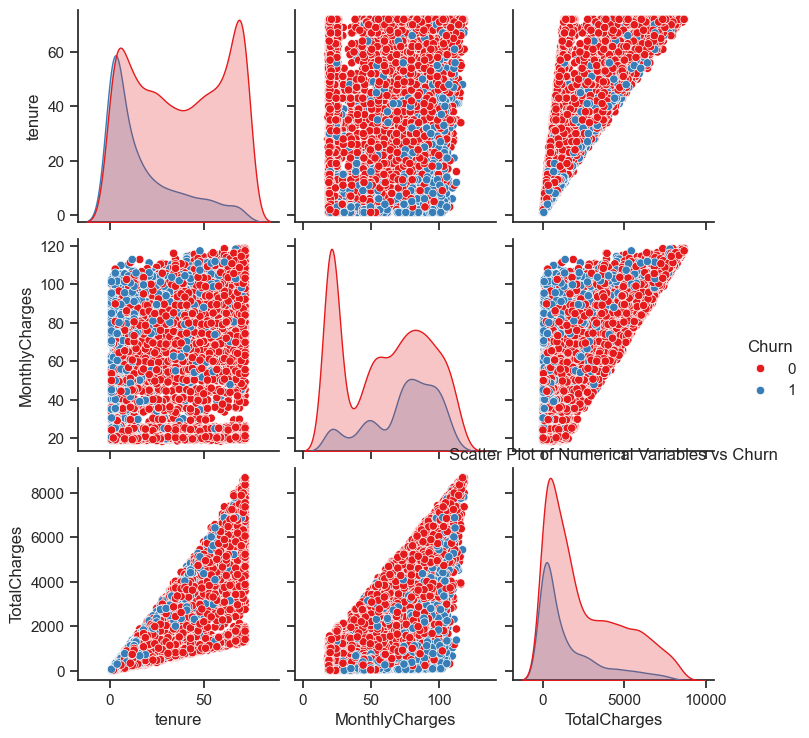

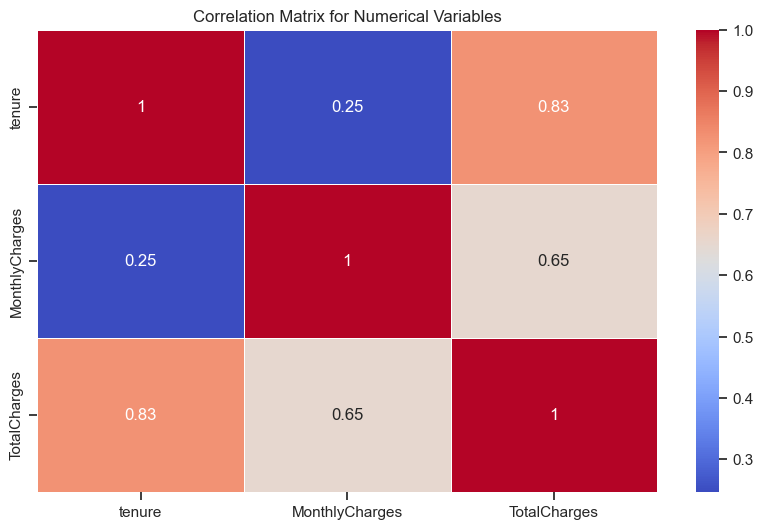

In [35]:

# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a pair plot (scatter plot for numerical vs numerical)
sns.pairplot(df[numerical_features + ['Churn']], hue='Churn', palette='Set1')
plt.title('Scatter Plot of Numerical Variables vs Churn')
plt.show()

# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


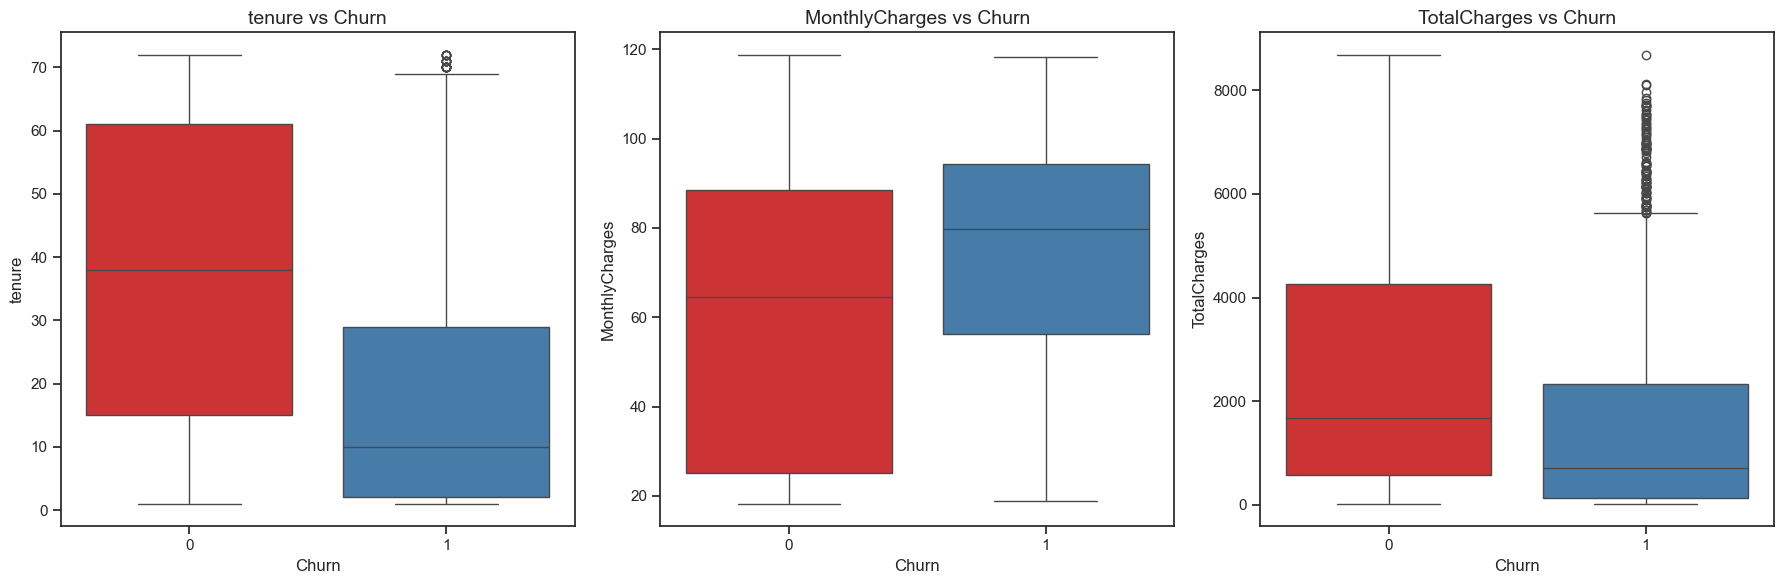

In [36]:

# List of numerical features for bivariate analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the plot grid for numerical vs Churn using box plots
plt.figure(figsize=(18, 6))

# Create box plots for each numerical feature vs Churn
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns layout for box plots
    sns.boxplot(data=df, x='Churn', y=feature, palette='Set1')
    plt.title(f'{feature} vs Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


## Observations 
1. Scatter Plot of Numerical Variables vs Churn:
- Tenure vs Churn:

* There appears to be a higher concentration of churned customers (Churn = 1) with shorter tenures (closer to 0). This suggests that customers who churn tend to have shorter tenures compared to those who stay longer.
* The non-churned group (Churn = 0) tends to have a wider spread of tenures, particularly in the mid-to-long range.

- MonthlyCharges vs Churn:

* There is a higher concentration of churned customers in the upper range of MonthlyCharges. This indicates that customers who are paying higher monthly charges may be more likely to churn.
* Non-churned customers seem to be more spread out across MonthlyCharges, but with more in the lower to mid-range charges.

- TotalCharges vs Churn:

* Since TotalCharges are highly influenced by tenure (customers with longer tenures naturally accumulate higher total charges), churned customers are clustered in the lower total charge range. This reinforces the observation that customers with shorter tenures are more likely to churn.
* Non-churned customers tend to accumulate more TotalCharges, which correlates with their longer service duration.

2. Correlation Matrix :
- Tenure and TotalCharges: There is a strong positive correlation of 0.83 between tenure and TotalCharges. This is expected, as customers who have stayed with the company for a longer time accumulate more total charges.
- Tenure and MonthlyCharges: The correlation between tenure and MonthlyCharges is relatively weak (0.25). This suggests that the monthly charges customers pay are not directly linked to how long they’ve been with the service.
- MonthlyCharges and TotalCharges: There is a moderate positive correlation of 0.65 between these two variables. Customers with higher MonthlyCharges tend to have higher TotalCharges, though the correlation is not perfect, likely due to variation in how long customers have been using the service.
### Insights:
Churn Likelihood:

1. Tenure is a key factor for churn. Customers with shorter tenures are much more likely to churn, indicating that early customer retention strategies should be prioritised.
Higher MonthlyCharges seem to be associated with a greater likelihood of churn. This suggests that customers paying more may feel that the value they receive isn’t aligned with the cost, leading to dissatisfaction and churn.
Longer-Tenured Customers:

2. Customers who have been with the company longer tend to stay and accumulate more TotalCharges. This suggests that as customers continue using the service, they become more loyal, which could be used to encourage long-term commitments through incentives like discounts or loyalty programmes.
Moderate Correlation Between MonthlyCharges and TotalCharges:

3. Since TotalCharges combine both tenure and MonthlyCharges, the 0.65 correlation suggests that while higher monthly charges contribute to higher total charges, tenure plays a stronger role in total charges. This highlights the importance of retaining customers long enough for the company to accumulate revenue.
### Recommendations Based on Insights:
Early Retention Focus: The company should focus retention efforts on customers with shorter tenures, possibly by offering onboarding incentives, early discounts, or improved customer support within the first year.

Price-Sensitivity Analysis: Consider investigating further into why customers paying higher monthly charges are more likely to churn. There may be dissatisfaction with the price-value relationship that could be mitigated through bundled offers or price restructuring for premium plans.

Loyalty and Incentive Programs: Encourage longer-term customer retention through loyalty programmes or contracts that incentivise staying with the company for a longer period.

## Multivariate Analysis

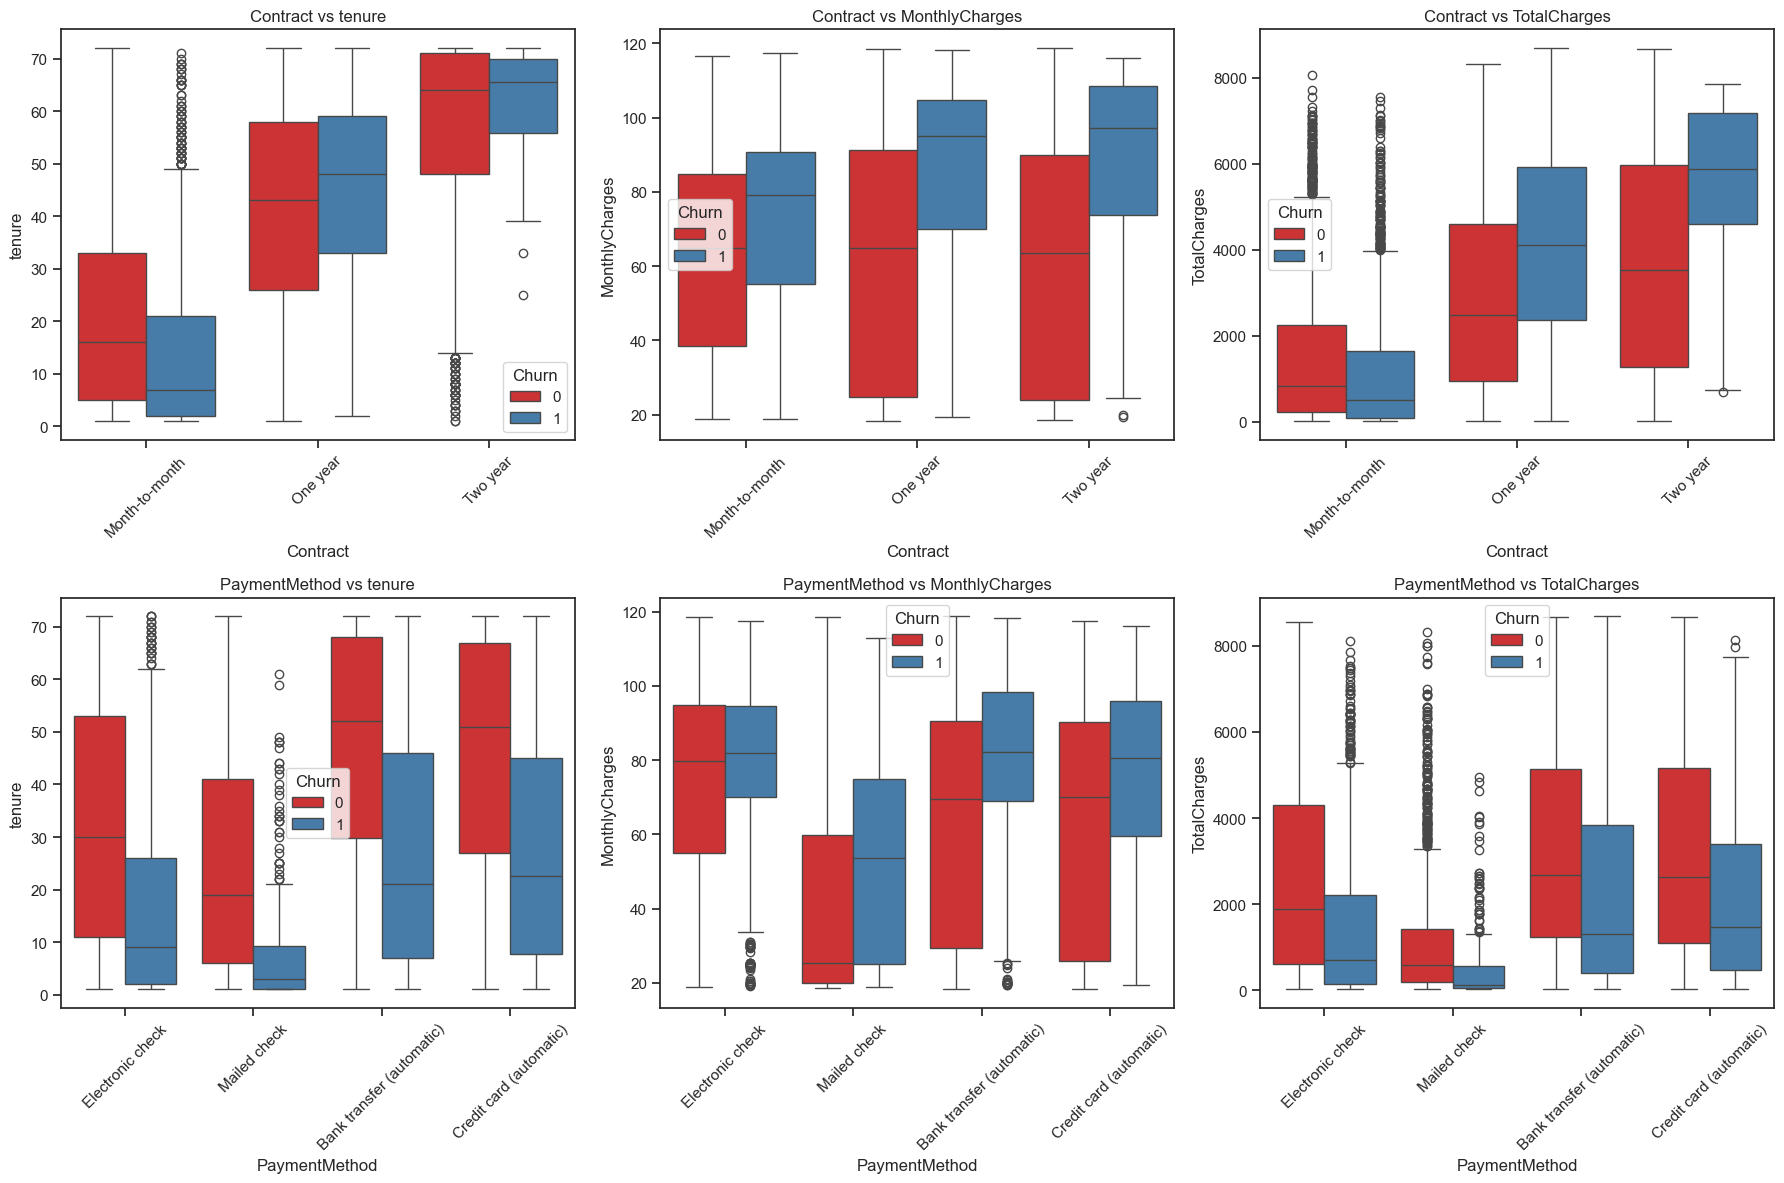

In [37]:
#categorical and numerical multivariate analysis
# Set up a grid of box plots for interaction between Contract, PaymentMethod, and numerical features
selected_categorical = ['Contract', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create the plot grid for each categorical feature and numerical variable
plt.figure(figsize=(18, 12))
for i, cat_feature in enumerate(selected_categorical):
    for j, num_feature in enumerate(numerical_features):
        plt.subplot(len(selected_categorical), len(numerical_features), i * len(numerical_features) + j + 1)
        sns.boxplot(data=df, x=cat_feature, y=num_feature, hue='Churn', palette='Set1')
        plt.title(f'{cat_feature} vs {num_feature}', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

plt.show()


## Observation 
* Churn is higher among customers with month-to-month contracts and those who pay via electronic check. These customers also tend to have shorter tenures and higher monthly charges.

* Longer-term contracts (one-year and two-year) are associated with lower churn rates, and these customers generally have longer tenures and higher total charges. They seem more loyal and stable.

* Electronic check users are at a higher risk of churning, potentially because they face higher monthly charges. This payment method could be a signal for identifying at-risk customers.

* Bank transfer and credit card users, especially those on long-term contracts, tend to have longer tenures, lower churn, and higher total charges.

### Actionable Insights for Retention Strategies:
* Target month-to-month contract customers with retention efforts, such as offering discounts or incentives for switching to longer-term contracts (one-year or two-year).

* Investigate the electronic check payment method to understand why these customers face higher churn rates. Offering alternative payment methods or promotions could help retain these customers.

* Monitor high monthly charge customers (especially those on month-to-month contracts) and offer tailored loyalty programs to reduce churn.

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numerical features for VIF calculation
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Adding constant term to the model for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF
print(vif_data)



          Feature        VIF
0           const  14.973839
1          tenure   5.844646
2  MonthlyCharges   3.225293
3    TotalCharges   9.526697


## Observation
#### Insights:
- There is a high Multicollinearity Between Tenure and TotalCharges:

- Both tenure and TotalCharges are strongly correlated because the longer a customer stays, the higher their TotalCharges. Including both variables in the same model can cause redundancy and inflate standard errors, leading to less reliable model coefficients.
### Recommendation:
I will have to drop one of the two variables. I will drop tenure and use the tenure _group created after encoding it

MonthlyCharges has an acceptable VIF and does not show high multicollinearity with the other features. i can safely keep this variable in my model.

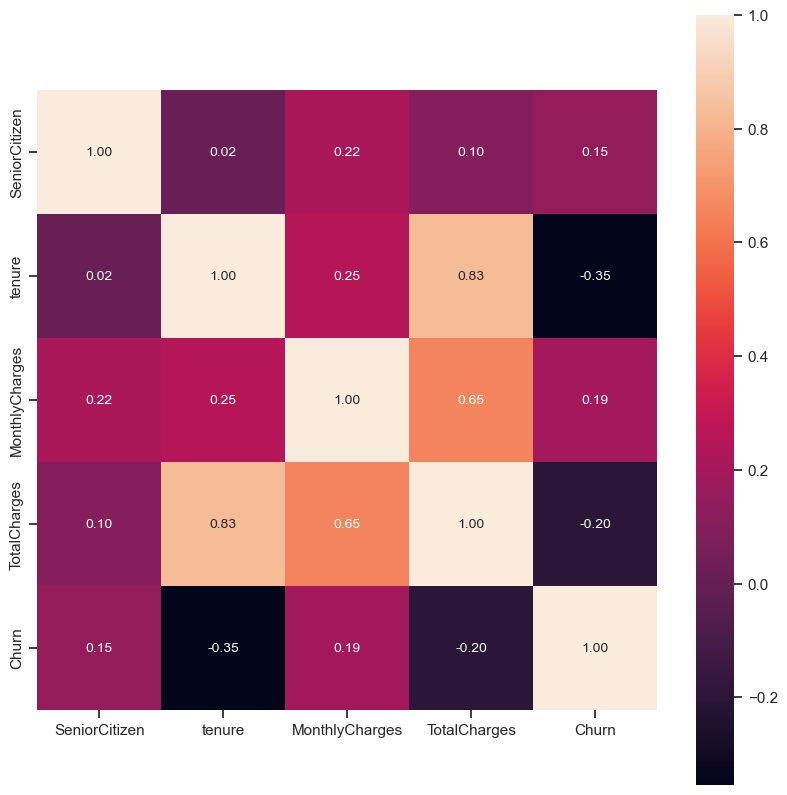

In [39]:

# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
hm = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

# Show the plot
plt.show()


## Observations:
Tenure is a strong predictor of churn: Customers who have stayed longer are much less likely to churn. This suggests that retention efforts should focus on new or short-term customers.

MonthlyCharges and Churn: There is a positive correlation between monthly charges and churn, meaning customers with higher monthly bills are somewhat more likely to churn. This could indicate dissatisfaction with pricing for some customers.

Senior citizens show a weak relationship with churn: While there is a slight positive correlation between being a senior citizen and churn, it’s not a strong enough relationship to draw any significant conclusions.

TotalCharges is indirectly related to churn via tenure: Customers who have been with the company longer have accumulated higher total charges and are less likely to churn, making tenure a key factor.

## Actionable Insights:
Focus on new or short-tenured customers: Since churn is highly correlated with shorter tenure, efforts should be made to engage and retain new customers, perhaps through loyalty programs or tailored offers.

Review pricing for customers with high MonthlyCharges: The positive correlation between MonthlyCharges and churn suggests that some customers may find the pricing too high, leading them to leave. A review of the pricing structure or offering discounts might help retain these customers.

## Data Preprocessing and Feature engineering

In [40]:
#Create df1 as a copy of df to avoid modifying df
df1 = df.copy()
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

In [42]:
# Convert '	tenure_group' from 'category' to 'object' type
df1['tenure_group'] = df1['tenure_group'].astype('object')


In [43]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [44]:
# Create a copy of the data and drop the irrelevant features
df1 = df.drop(columns=["customerID", "tenure"])
df1.shape

(7032, 20)

In [45]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36


In [46]:
#apply one.hot encoding
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [47]:
# Convert all boolean columns to integers (0 and 1)
df1_dummies = df1_dummies.astype(int)

# Display the first few rows
df1_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [48]:
# assign Churn to a variable
labels=df1_dummies["Churn"]
labels.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [49]:
# drop the Target variable which is the churn
features =df1_dummies.drop("Churn", axis=1)
features.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


## Model Development

In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
train_features,test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state = 100)
train_features.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
1010,0,50,160,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2732,0,20,94,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2940,1,54,2854,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
859,0,64,4719,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2895,0,19,717,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [52]:
# change naming convention
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state = 100)

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# normalise data using scaler
#initialise scaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [54]:
# Check if scaling is successful the minimum and maximum values for each feature
print("Minimum values per feature:\n", Xtrain_scaled.min(axis=0))
print("Maximum values per feature:\n", Xtrain_scaled.max(axis=0))

Minimum values per feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Maximum values per feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


## Model training

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [56]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [57]:
# fit the model
model_dt.fit(Xtrain_scaled,ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [58]:
#predict on test data
predictions = model_dt.predict(Xtest_scaled)

## Model Evaluation

              precision    recall  f1-score   support

           0    0.81662   0.89240   0.85283      1013
           1    0.63667   0.48477   0.55043       394

    accuracy                        0.77825      1407
   macro avg    0.72664   0.68859   0.70163      1407
weighted avg    0.76623   0.77825   0.76815      1407



<Axes: >

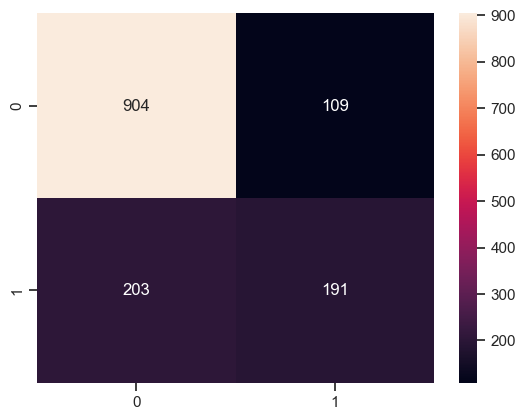

In [59]:
# print classification report
report = classification_report(ytest, predictions, digits=5)
print(report)
# plot confusion matrix
matrix = confusion_matrix(ytest, predictions)
sns.heatmap(matrix, annot=True, fmt='g')

## Observation
The model did not perform well the recall on minority class which is the most important metric in this analysis is poor we will try to improve model performance

### Improving model performance using class weight

              precision    recall  f1-score   support

           0    0.89460   0.70385   0.78785      1013
           1    0.50820   0.78680   0.61753       394

    accuracy                        0.72708      1407
   macro avg    0.70140   0.74533   0.70269      1407
weighted avg    0.78640   0.72708   0.74015      1407

[[713 300]
 [ 84 310]]


<Axes: >

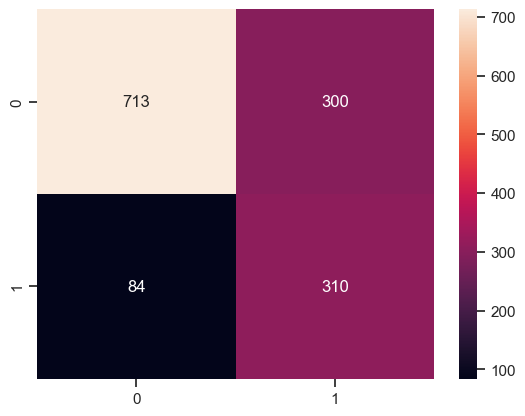

In [60]:
# initialise and let the model focus more on class1 which is the minority class
model_dt_cw=DecisionTreeClassifier(criterion = "gini",random_state = 100, class_weight={0:1, 1:3}, max_depth=6, min_samples_leaf=8) 
# fit the model(train)
model_dt_cw.fit(Xtrain_scaled, ytrain)
# model prediction
predictions = model_dt_cw.predict(Xtest_scaled)
#classification report
report = classification_report(ytest, predictions, digits=5)
print(report)
# Confusion matrix
matrix = confusion_matrix(ytest, predictions)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

### observation
The model performance is better but the false negatives and  positive are too high. we will further improve the model using SMOTEENN and see if it performs better

### Improving model performance using SMOTEENN

Model accuracy with SMOTEENN on test set: 0.92690
Classification Report (With SMOTEENN):
               precision    recall  f1-score   support

           0    0.93525   0.89041   0.91228       438
           1    0.92118   0.95408   0.93734       588

    accuracy                        0.92690      1026
   macro avg    0.92822   0.92225   0.92481      1026
weighted avg    0.92719   0.92690   0.92664      1026

Confusion Matrix (With SMOTEENN):
 [[390  48]
 [ 27 561]]


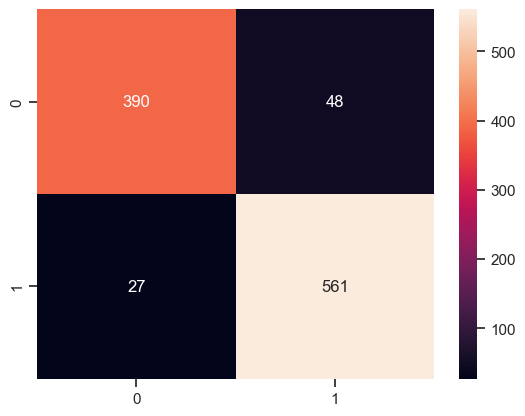

In [61]:
# Applying SMOTEENN to handle class imbalance
sm = SMOTEENN(random_state=100)
X_resampled, y_resampled = sm.fit_resample(Xtrain_scaled, ytrain)

# Split the resampled data into training and test sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Train the decision tree model on resampled data
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(Xr_train, yr_train)

# Predict and evaluate on the test set from resampled data
yr_test_pred = model_dt_smote.predict(Xr_test)
model_score_r = model_dt_smote.score(Xr_test, yr_test)

# Display the accuracy and classification report
print(f"Model accuracy with SMOTEENN on test set: {model_score_r:.5f}")
print("Classification Report (With SMOTEENN):\n", classification_report(yr_test, yr_test_pred, digits=5))

# Display the confusion matrix for the model trained with SMOTEENN 
matrix_resampled = confusion_matrix(yr_test, yr_test_pred)
sns.heatmap(matrix_resampled, annot=True, fmt='g')
print("Confusion Matrix (With SMOTEENN):\n", matrix_resampled)

### Observation
The model performance has significantly improved 

## Random Forest Model

              precision    recall  f1-score   support

           0    0.81851   0.90819   0.86102      1013
           1    0.67138   0.48223   0.56130       394

    accuracy                        0.78891      1407
   macro avg    0.74494   0.69521   0.71116      1407
weighted avg    0.77731   0.78891   0.77709      1407



<Axes: >

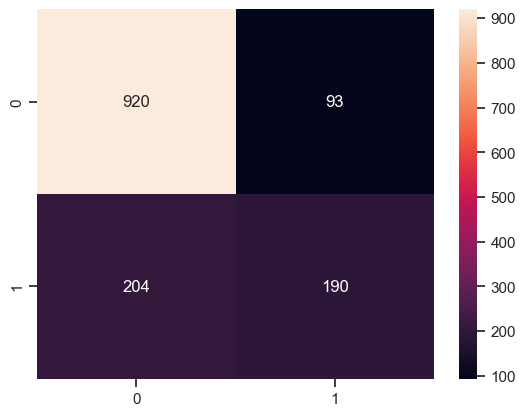

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(n_estimators=100,criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(Xtrain_scaled,ytrain)
predictions = model_rf.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
print(report)
matrix = confusion_matrix(ytest, predictions)
sns.heatmap(matrix, annot=True, fmt='g')


## Improving model performance using class weight and Hyperparameter Tuning

              precision    recall  f1-score   support

           0    0.88917   0.70484   0.78634      1013
           1    0.50497   0.77411   0.61122       394

    accuracy                        0.72424      1407
   macro avg    0.69707   0.73947   0.69878      1407
weighted avg    0.78158   0.72424   0.73730      1407



<Axes: >

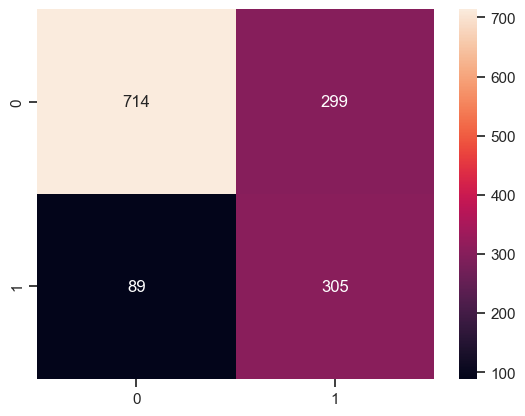

In [63]:
# initialise random forest model
model_rf=RandomForestClassifier(n_estimators=100,criterion = "gini",random_state = 100,class_weight={0:1, 1:3},max_depth=6, min_samples_leaf=8)
model_rf.fit(Xtrain_scaled,ytrain)
# predict on test data
predictions = model_rf.predict(Xtest_scaled)
# print classification report
report = classification_report(ytest, predictions, digits=5)
print(report)
#Plot confusion matrix
matrix = confusion_matrix(ytest, predictions)
sns.heatmap(matrix, annot=True, fmt='g')

## Improving model performance with Smoteenn

Model accuracy with SMOTEENN on test set: 0.93665
Classification Report (With SMOTEENN):
               precision    recall  f1-score   support

           0    0.94090   0.90868   0.92451       438
           1    0.93367   0.95748   0.94542       588

    accuracy                        0.93665      1026
   macro avg    0.93728   0.93308   0.93497      1026
weighted avg    0.93675   0.93665   0.93649      1026

Confusion Matrix (With SMOTEENN):
 [[398  40]
 [ 25 563]]


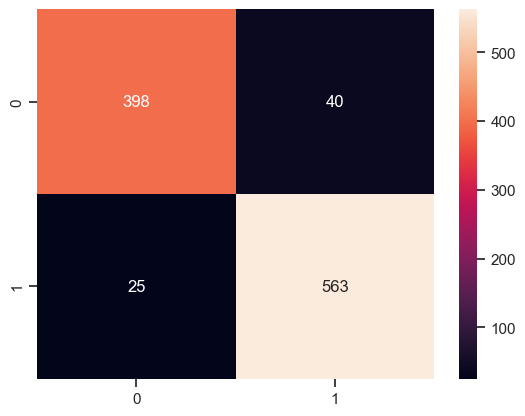

In [64]:
# Applying SMOTEENN to handle class imbalance
sm = SMOTEENN(random_state=100)
X_resampled, y_resampled = sm.fit_resample(Xtrain_scaled, ytrain)

# Split the resampled data into training and test sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Train the decision tree model on resampled data
model_rf_smote = RandomForestClassifier(n_estimators=100,criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(Xr_train, yr_train)

# Predict and evaluate on the test set from resampled data
yr_test_pred = model_rf_smote.predict(Xr_test)
model_score_r = model_rf_smote.score(Xr_test, yr_test)

# Display the accuracy and classification report
print(f"Model accuracy with SMOTEENN on test set: {model_score_r:.5f}")
print("Classification Report (With SMOTEENN):\n", classification_report(yr_test, yr_test_pred, digits=5))

# Display the confusion matrix for the model trained with SMOTEENN 
matrix_resampled = confusion_matrix(yr_test, yr_test_pred)
sns.heatmap(matrix_resampled, annot=True, fmt='g')
print("Confusion Matrix (With SMOTEENN):\n", matrix_resampled)

## Observation
Random forest performance kept increasing with each technique used and performed better than the decision tree with the addition of SMOTEENN

## Creating more classifiers

<--- Logistic Regression --->
              precision    recall  f1-score   support

           0    0.88724   0.70681   0.78681      1013
           1    0.50500   0.76904   0.60966       394

    accuracy                        0.72424      1407
   macro avg    0.69612   0.73792   0.69824      1407
weighted avg    0.78020   0.72424   0.73720      1407

[[716 297]
 [ 91 303]]


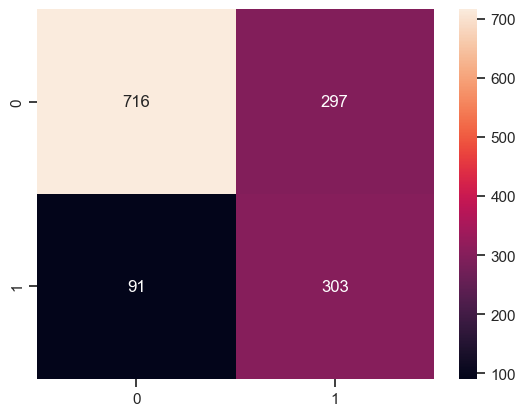

<--- SGD Classifier --->
              precision    recall  f1-score   support

           0    0.85526   0.76999   0.81039      1013
           1    0.52929   0.66497   0.58943       394

    accuracy                        0.74058      1407
   macro avg    0.69228   0.71748   0.69991      1407
weighted avg    0.76398   0.74058   0.74851      1407

[[780 233]
 [132 262]]


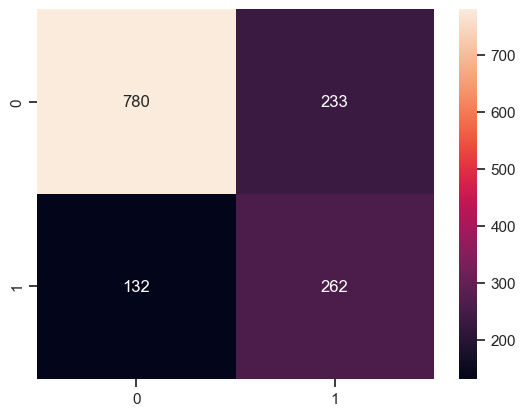

<--- XGBClassifier --->
              precision    recall  f1-score   support

           0    0.85872   0.76802   0.81084      1013
           1    0.53094   0.67513   0.59441       394

    accuracy                        0.74200      1407
   macro avg    0.69483   0.72157   0.70263      1407
weighted avg    0.76693   0.74200   0.75023      1407

[[778 235]
 [128 266]]


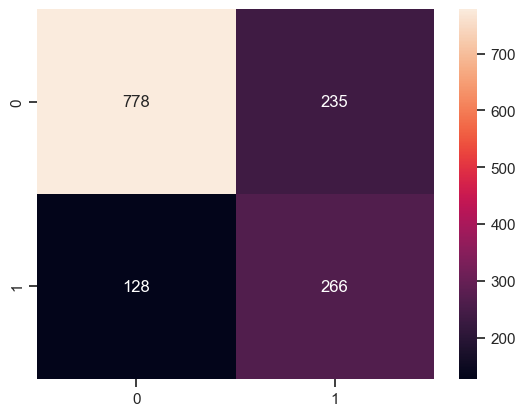

In [65]:
# Importing necessary libraries and classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

classifiers = [
    [LogisticRegression(random_state=100, class_weight={0:1, 1:3}), "Logistic Regression"],
    [SGDClassifier(random_state=100, class_weight={0:1, 1:3}), "SGD Classifier"],
    [XGBClassifier(random_state=100, scale_pos_weight=3), "XGBClassifier"],        
]
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<--- {model_name} --->")
    #fit the models
    model.fit(Xtrain_scaled, ytrain) 
    predictions = model.predict(Xtest_scaled)
    # Evaluate the models
    report = classification_report(ytest, predictions, digits=5)
    print(report)
    matrix = confusion_matrix(ytest, predictions)
    print(matrix)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

## Observation
Even with attention paid to class weights the models still did not perform as expected,
we will add smoteenn to see if they perform better, the logistic regression performed better than others but it's not good enough.

## Improving model performance with Smoteenn

<--- Logistic Regression with SMOTEENN --->
Model accuracy with SMOTEENN on test set: 0.89474
Classification Report (With SMOTEENN):
               precision    recall  f1-score   support

           0    0.95330   0.79224   0.86534       438
           1    0.86254   0.97109   0.91360       588

    accuracy                        0.89474      1026
   macro avg    0.90792   0.88166   0.88947      1026
weighted avg    0.90128   0.89474   0.89300      1026

Confusion Matrix (With SMOTEENN):
 [[347  91]
 [ 17 571]]


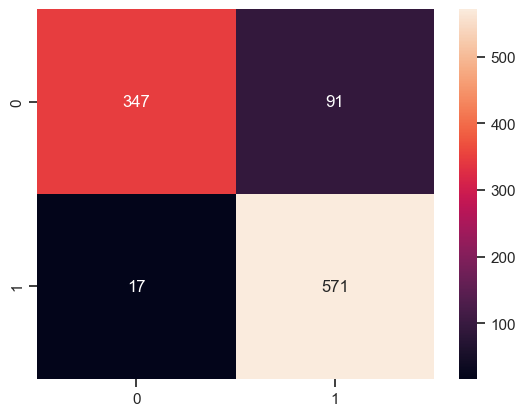

<--- SGD Classifier with SMOTEENN --->
Model accuracy with SMOTEENN on test set: 0.90448
Classification Report (With SMOTEENN):
               precision    recall  f1-score   support

           0    0.91872   0.85160   0.88389       438
           1    0.89516   0.94388   0.91887       588

    accuracy                        0.90448      1026
   macro avg    0.90694   0.89774   0.90138      1026
weighted avg    0.90522   0.90448   0.90394      1026

Confusion Matrix (With SMOTEENN):
 [[373  65]
 [ 33 555]]


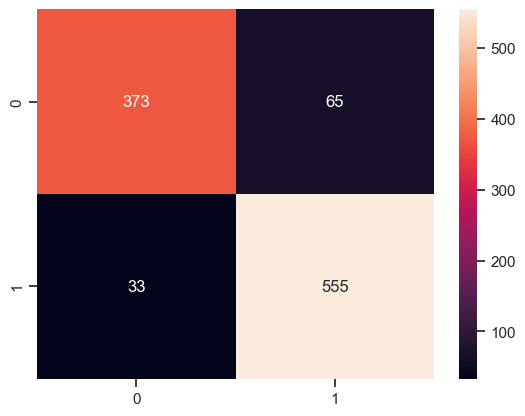

<--- XGBClassifier with SMOTEENN --->
Model accuracy with SMOTEENN on test set: 0.96296
Classification Report (With SMOTEENN):
               precision    recall  f1-score   support

           0    0.95872   0.95434   0.95652       438
           1    0.96610   0.96939   0.96774       588

    accuracy                        0.96296      1026
   macro avg    0.96241   0.96186   0.96213      1026
weighted avg    0.96295   0.96296   0.96295      1026

Confusion Matrix (With SMOTEENN):
 [[418  20]
 [ 18 570]]


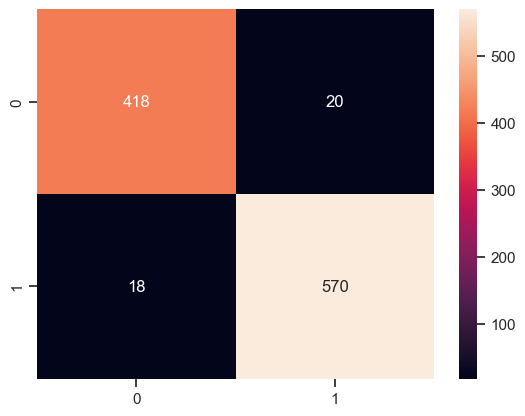

In [66]:
#initialise  SMOTEENN to handle class imbalance
sm = SMOTEENN(random_state=100)
X_resampled, y_resampled = sm.fit_resample(Xtrain_scaled, ytrain)

# Split the resampled data into training and test sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Define classifiers with weights for class imbalance (applied after SMOTEENN)
classifiers = [
    [LogisticRegression(random_state=100, class_weight={0:1, 1:3}), "Logistic Regression"],
    [SGDClassifier(random_state=100, class_weight={0:1, 1:3}), "SGD Classifier"],
    [XGBClassifier(random_state=100), "XGBClassifier"], 
]

# Loop through each classifier, train on the resampled data, and evaluate
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<--- {model_name} with SMOTEENN --->")
    
    # Train the model on resampled training data
    model.fit(Xr_train, yr_train)
    
    # Make predictions on the resampled test data
    yr_test_pred = model.predict(Xr_test)
    
    # Evaluate the model: accuracy and classification report
    model_score_r = model.score(Xr_test, yr_test)
    print(f"Model accuracy with SMOTEENN on test set: {model_score_r:.5f}")
    report = classification_report(yr_test, yr_test_pred, digits=5)
    print("Classification Report (With SMOTEENN):\n", report)
    
    # Display the confusion matrix for each model
    matrix_resampled = confusion_matrix(yr_test, yr_test_pred)
    print("Confusion Matrix (With SMOTEENN):\n", matrix_resampled)
    sns.heatmap(matrix_resampled, annot=True, fmt='g')
    plt.show()

## Observation
The models all performed better with smotteen with the XGB performing best 
* The model correctly identified 570 churn cases and 418 non-churn cases. This indicates that the model is performing well in correctly classifying both churn and non-churn instances.
* There are only 20 false positives and 18 false negatives, which suggests that the model is not only accurate but also well-balanced, with minimal errors in both classes.
A lower false negative rate is often desired in churn prediction, as it implies fewer instances of actual churn being missed. In this case, only 18 true churn cases were misclassified as non-churn, which is a positive outcome.
* This high recall (approximately 97%) indicates that the model effectively identifies churn cases, which is crucial in churn prediction where it’s often more critical to catch potential churns.
* This high specificity (approximately 95%) suggests that the model is also good at identifying non-churn customers, reducing the likelihood of unnecessary retention efforts on customers unlikely to churn.
* The model shows a strong, balanced performance across both classes (churn and non-churn), with high accuracy in identifying true churn cases while also maintaining a low rate of false positives.
This balance indicates that the model is well-suited for churn prediction, where both false positives and false negatives can have financial implications (e.g., unnecessary retention efforts vs. missed churn cases).

## Conclusion
The XGBClassifier has achieved strong predictive accuracy, balanced recall, and specificity, making it a suitable model for identifying and addressing potential churn in a business context. Its balanced performance across churn and non-churn classes allows it to support effective and efficient churn management strategies.
Given this performance, the model could be used confidently to drive targeted retention campaigns, focusing efforts on the correctly identified churn customers (570 cases). Additionally, the low false positive rate (20 cases) ensures minimal unnecessary interventions with non-churn customers, optimising resource allocation.


In [67]:
# Loop through each classifier, to save the xgbclassifier which is the best performing
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    # Train the model on resampled training data
    model.fit(Xr_train, yr_train)
    
    # Immediately save the XGBClassifier model to model_xgb after training
    if model_name == "XGBClassifier":
        model_xgb = model  # Save XGBClassifier to model_xgb right after training
    



# Check for Overfitting

Model accuracy on SMOTE+ENN resampled training set: 0.99259
Classification Report on SMOTE+ENN Training Set:
               precision    recall  f1-score   support

           0    0.99155   0.99062   0.99108      2132
           1    0.99332   0.99399   0.99366      2994

    accuracy                        0.99259      5126
   macro avg    0.99244   0.99230   0.99237      5126
weighted avg    0.99259   0.99259   0.99259      5126

Confusion Matrix on SMOTE+ENN Training Set:
 [[2112   20]
 [  18 2976]]


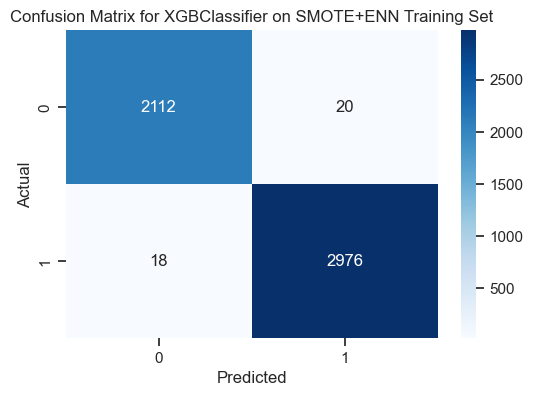

Model accuracy on SMOTE+ENN resampled test set: 0.96296
Classification Report on SMOTE+ENN Test Set:
               precision    recall  f1-score   support

           0    0.95872   0.95434   0.95652       438
           1    0.96610   0.96939   0.96774       588

    accuracy                        0.96296      1026
   macro avg    0.96241   0.96186   0.96213      1026
weighted avg    0.96295   0.96296   0.96295      1026

Confusion Matrix on SMOTE+ENN Test Set:
 [[418  20]
 [ 18 570]]


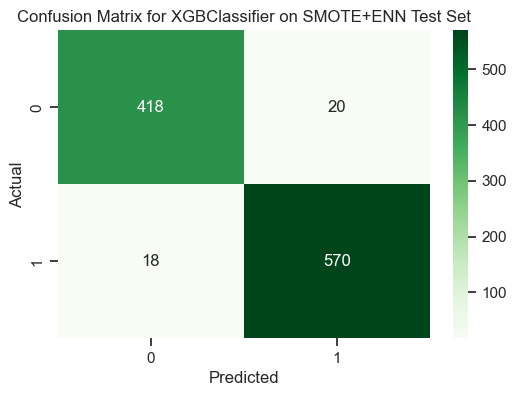

In [68]:
# Check for overfitting on the SMOTE+ENN resampled training set
train_predictions_resampled = model_xgb.predict(X_resampled)
train_accuracy_resampled = model_xgb.score(X_resampled, y_resampled)
print(f"Model accuracy on SMOTE+ENN resampled training set: {train_accuracy_resampled:.5f}")
train_report_resampled = classification_report(y_resampled, train_predictions_resampled, digits=5)
print("Classification Report on SMOTE+ENN Training Set:\n", train_report_resampled)

# Display the confusion matrix for the resampled training set
train_matrix_resampled = confusion_matrix(y_resampled, train_predictions_resampled)
print("Confusion Matrix on SMOTE+ENN Training Set:\n", train_matrix_resampled)
plt.figure(figsize=(6, 4))
sns.heatmap(train_matrix_resampled, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix for XGBClassifier on SMOTE+ENN Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Check generalisation on the SMOTE+ENN resampled test set
test_predictions_resampled = model_xgb.predict(Xr_test)
test_accuracy_resampled = model_xgb.score(Xr_test, yr_test)
print(f"Model accuracy on SMOTE+ENN resampled test set: {test_accuracy_resampled:.5f}")
test_report_resampled = classification_report(yr_test, test_predictions_resampled, digits=5)
print("Classification Report on SMOTE+ENN Test Set:\n", test_report_resampled)

# Display the confusion matrix for the resampled test set
test_matrix_resampled = confusion_matrix(yr_test, test_predictions_resampled)
print("Confusion Matrix on SMOTE+ENN Test Set:\n", test_matrix_resampled)
plt.figure(figsize=(6, 4))
sns.heatmap(test_matrix_resampled, annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix for XGBClassifier on SMOTE+ENN Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## Conclusion
These results suggest that the XGBClassifier model is robust and well-generalised when evaluated on SMOTE+ENN-resampled data. The minimal performance drop from training to test sets is expected and does not indicate overfitting concerns. This model is ready for further evaluation or deployment based on these metrics.

## Cross validation

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from imblearn.combine import SMOTEENN

#  resampling
smote_enn = SMOTEENN(random_state=100)
X_resampled, y_resampled = smote_enn.fit_resample(Xtrain_scaled, ytrain)

#  cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
scores = cross_val_score(model_xgb, X_resampled, y_resampled, cv=cv, scoring='recall')

# Print results
print(f"Scores: {scores}")
print(f"Mean: {scores.mean():.3f}")

Scores: [0.97662771 0.96822742 0.97161937 0.96661102 0.96828047]
Mean: 0.970


## Observation
The cross-validation results confirm that the XGBClassifier with SMOTEENN is performing robustly and generalizes well to different subsets of the resampled data, with a high and stable recall. This suggests that it is indeed a reliable choice for ConnectTel’s churn prediction, as it effectively identifies at-risk customers across varied data splits.

## Feature Importance for XGBOOST classifier

In [70]:
classifiers[2][0]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [71]:
classifiers[2][0].feature_importances_

array([0.00924381, 0.01150794, 0.00610448, 0.00935448, 0.        ,
       0.00455317, 0.        , 0.00663912, 0.        , 0.00908114,
       0.        , 0.0069022 , 0.        , 0.00588415, 0.01835678,
       0.02339178, 0.        , 0.07405417, 0.        , 0.00479715,
       0.00882838, 0.        , 0.00353533, 0.00632477, 0.        ,
       0.00424664, 0.03626424, 0.        , 0.00412931, 0.01238846,
       0.        , 0.00996885, 0.00946568, 0.        , 0.00526989,
       0.52710754, 0.0488408 , 0.00788261, 0.01048487, 0.        ,
       0.00888662, 0.00591304, 0.02332627, 0.00699531, 0.02125217,
       0.0058693 , 0.02274675, 0.00653913, 0.00626361, 0.00760015],
      dtype=float32)

In [72]:
# Assign classifeier to a variable
importances = classifiers[2][0].feature_importances_

In [73]:
# Assign features to a variable
feature_names = features.columns

In [74]:
# create a dataframe for feature importance
feature_importance_df = pd.DataFrame({'Features':feature_names,'Importances':importances})
# print top 15 importance features
feature_importance_df=feature_importance_df.sort_values(by = "Importances", ascending =False)

In [75]:
feature_importance_df

,Features,Importances
35,Contract_Month-to-month,0.527108
17,OnlineSecurity_No,0.074054
36,Contract_One year,0.048841
26,TechSupport_No,0.036264
15,InternetService_Fiber optic,0.023392
42,PaymentMethod_Electronic check,0.023326
46,tenure_group_25 - 36,0.022747
44,tenure_group_1 - 12,0.021252
14,InternetService_DSL,0.018357
29,StreamingTV_No,0.012388


In [76]:
# Assign the dataframe to a variable for plotting
top_feature_importance_df=feature_importance_df.head(10)

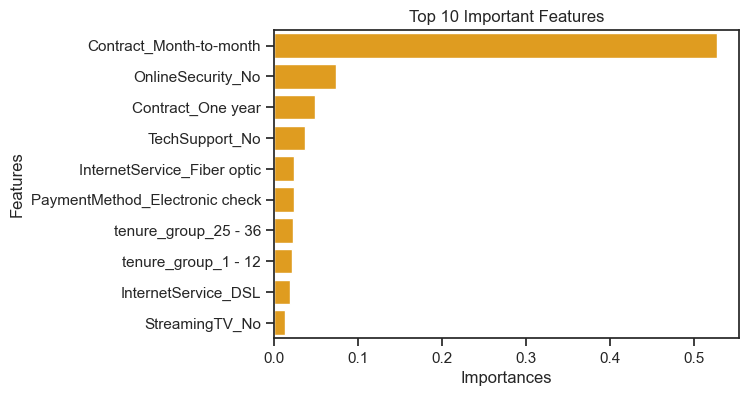

In [77]:
# plot a chart of important features 
plt.figure(figsize =(6, 4))
sns.barplot(x="Importances", y="Features", data=top_feature_importance_df, color="Orange")
plt.title("Top 10 Important Features")
plt.show()

## Observations from Feature Importance Plot
#### Contract_Month-to-month:

This feature has the highest importance, suggesting that customers with a month-to-month contract are a significant indicator for churn. This aligns with industry trends, as month-to-month contracts generally imply a lower commitment, making it easier for customers to leave.
#### InternetService_No:

The second most important feature is whether customers do not have internet service. This could indicate that customers without internet services are either less engaged or lower-value customers, who may be more likely to churn.
#### Contract_One year:

This feature ranks third, indicating that customers with one-year contracts are somewhat more stable but still represent a moderate churn risk compared to longer-term contracts. Customers on short contracts (like one-year) might reconsider or cancel once the contract term ends.
#### OnlineSecurity_No:

Not having online security services is another critical churn predictor. Customers who choose not to opt for additional security services may be less invested in their current provider or less reliant on the services, making them more likely to leave.
#### InternetService_Fiber optic:

Customers with fibre optic internet are more likely to churn, perhaps due to cost or performance issues compared to alternatives. Fibre optic services are often more expensive, which may lead to dissatisfaction if expectations are not met.
#### TechSupport_No:

Lack of tech support is another key indicator. Customers who don’t subscribe to tech support may feel less tied to the service provider, especially if they face issues and don’t have assistance available.
#### StreamingTV_Yes:

Having streaming TV services is also an important feature, indicating that customers who use this add-on service might have a different churn behaviour, possibly linked to the quality or pricing of the streaming services.
#### tenure_group_1 - 12:

Customers with a short tenure (1-12 months) are at higher risk of churn, which aligns with the typical behaviour where new customers tend to leave if the service does not meet their initial expectations.
#### InternetService_DSL:

Customers with DSL internet service have some churn risk, though it’s lower than those with fibre optic. This could reflect varying satisfaction levels with internet types, where DSL users might be somewhat more satisfied or have fewer alternatives.
#### MonthlyCharges:

Monthly charges, while less influential than other features, still play a role. Higher monthly charges may contribute to churn, especially if customers do not feel they are receiving good value.
## Insights for Business Strategy
Targeted Retention Campaigns: Focus retention efforts on customers with month-to-month contracts, short tenures, and those without additional services like online security and tech support. These customers are more likely to churn and may benefit from tailored offers or incentives.
Bundle Additional Services: Encourage adoption of add-ons such as online security or tech support, as customers who subscribe to these services tend to be more loyal. Bundling or offering discounts on these services could reduce churn rates.
Monitor High-Risk Segments: Customers with fibre optic internet and streaming TV services might need special attention, as they could have higher expectations due to the higher cost. Ensuring quality service in these areas might improve customer satisfaction and reduce churn.
Price Sensitivity: Monthly charges appear among the important factors, so reviewing pricing strategies, especially for high-paying customers, could be beneficial. Providing value-based pricing or loyalty discounts for long-tenured customers might enhance retention.

## Model interpretability


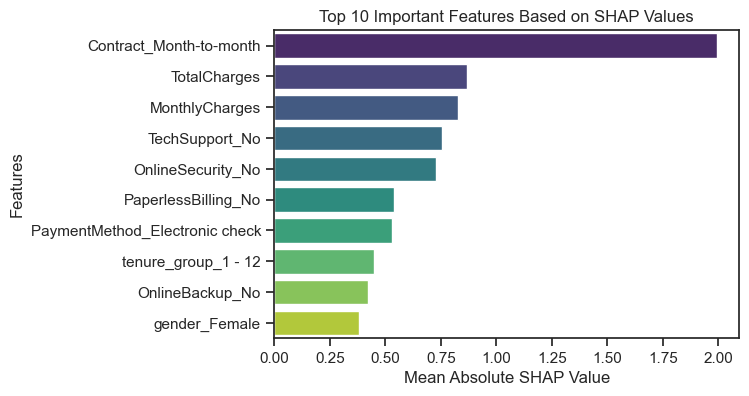

In [78]:
import shap

# Initialise the XGBoost model trained
model_xgb = classifiers[2][0]  

# Compute SHAP values
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(Xtest_scaled)

# Convert SHAP values to DataFrame, using the original feature names from Xtest (before scaling)
# Xtest was the original DataFrame before scaling
shap_df = pd.DataFrame(shap_values, columns=Xtest.columns)

# Compute mean absolute SHAP values for feature importance
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_shap_values[:10], y=mean_shap_values.index[:10], palette="viridis")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.title("Top 10 Important Features Based on SHAP Values")
plt.show()


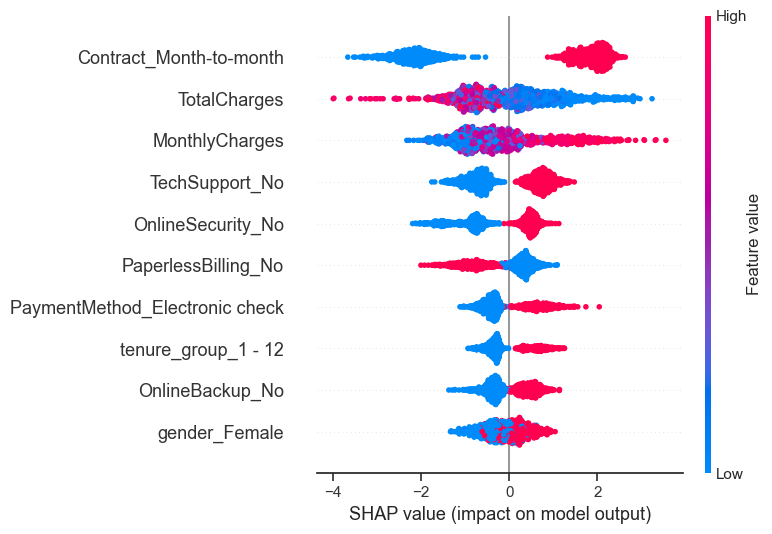

In [79]:
# Detailed summary plot showing only the top 10 features, using the original DataFrame with feature names
shap.summary_plot(shap_values, pd.DataFrame(Xtest_scaled, columns=Xtest.columns), max_display=10)


## Observations

The model relies significantly on a few top features, which drive predictions across the dataset. These important features should be the focus of any targeted interventions or improvements in data quality, as they have the most substantial influence on model output.
For features like Feature 35 and Feature 1, their high impact on the model means they could be key indicators of churn (or the target variable). Understanding these features in the business context can help design retention strategies that address specific risks.
Global and Local Insights:

Global Insights: The bar plot of mean absolute SHAP values provides a clear view of which features are generally the most important, giving stakeholders a high-level understanding of what factors matter the most in the model.
Local Insights: The detailed SHAP summary plot allows for understanding individual predictions, making it possible to explain why certain instances (e.g., high-risk churn cases) are predicted as such. This level of interpretability is crucial for debugging the model, answering specific stakeholder queries, and building trust in model decisions.
Next Steps for Interpretability:

Explore Feature Interactions: Some features show complex patterns in their SHAP values, suggesting potential interactions with other features. Investigating these interactions could uncover deeper insights and improve model accuracy if addressed appropriately.
Monitor and Test Key Features: Since the model heavily relies on a few key features, ensure these are accurate and stable over time. Regularly monitoring data quality and potential feature drift for these important features can help maintain model reliability.



Contract (Month-to-Month):The top feature impacting churn is the contract type, specifically the "Month-to-Month" option. Customers on month-to-month contracts are at a significantly higher risk of churning, possibly due to the flexibility to leave without long-term commitment.
Total Charges and Monthly Charges:

Both total and monthly charges are influential in predicting churn, with higher total or monthly charges correlating with increased churn. This might indicate that cost-sensitive customers are more likely to churn, possibly seeking better deals elsewhere.
Technical Support and Security Features:

Features like "TechSupport_No" and "OnlineSecurity_No" indicate that customers who do not have tech support or online security services are more likely to churn. This could reflect dissatisfaction with the lack of support services, or that customers with fewer add-ons may be less engaged.
Paperless Billing:

Customers without paperless billing (shown by "PaperlessBilling_No") tend to have a higher churn rate. This may hint that customers preferring traditional billing are less engaged or less familiar with the online system, which might affect their satisfaction levels.
Payment Method - Electronic Check:

The use of electronic checks as a payment method is also highly correlated with churn, suggesting that these customers might have a higher propensity to leave, potentially due to dissatisfaction with the service or preference for traditional payment options.
Tenure Group (1-12 months):

Customers within the "1 - 12" tenure group (shortest tenure) are more likely to churn. This aligns with typical customer lifecycle patterns, where newer customers are more susceptible to churn compared to long-term customers.
Other Add-Ons:

The lack of "OnlineBackup" and gender (particularly females) also show up as important features, though their SHAP values are relatively lower than the others. This could indicate certain service configurations or demographic characteristics contributing to churn in a smaller way.
## Insights:
This SHAP analysis highlights the importance of customer engagement through contracts, support, and added services to retain customers. Emphasis on service improvement, customer support, and better billing options could reduce churn, especially targeting month-to-month subscribers and those in the early stages of their tenure. Cost-sensitive customers might also benefit from tailored plans to enhance retention.Insights:
This SHAP analysis highlights the importance of customer engagement through contracts, support, and added services to retain customers. Emphasis on service improvement, customer support, and better billing options could reduce churn, especially targeting month-to-month subscribers and those in the early stages of their tenure. Cost-sensitive customers might also benefit from tailored plans to enhance retention.

#Testing Model Using Unitest

In [81]:
import unittest
import numpy as np

# Create a class called TestModelInference
class TestModelInference(unittest.TestCase):
	def setUp(self):
		self.model = model_xgb

		# set X_test as a class attribute
		self.Xtest = Xtest

	# define a test for prediction output values
	def test_prediction_output_values(self):
		print("Running test_prediction_output_values test case")

		# Get model predictions
		y_pred = self.model.predict(self.Xtest)
		unique_values = np.unique(y_pred)
		for value in unique_values:
			self.assertIn(value, [0, 1])
            
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.019s

OK


Running test_prediction_output_values test case


In [83]:
import unittest

import numpy as np

# Create a class called TestModelInference

class TestModelInference(unittest.TestCase):

	def setUp(self):

		self.model = model_xgb

		# set X_test as a class attribute

		self.Xtest = Xtest

	# define a test for prediction output values

	def test_prediction_output_values(self):

		print("Running test_prediction_output_values test case")

		# Get model predictions

		y_pred = self.model.predict(self.Xtest)

		unique_values = np.unique(y_pred)

		for value in unique_values:

			self.assertIn(value, [0, 1])
            
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

            


.
----------------------------------------------------------------------
Ran 1 test in 0.017s

OK


Running test_prediction_output_values test case


In [87]:
import unittest
import numpy as np


class TestModelInference(unittest.TestCase):
    def setUp(self):
        # Create a method that runs before every test case. Sets up the model and test data used across test cases.
        self.model = model_xgb
        self.Xtest = Xtest

    def test_prediction_output_values(self):
        # To ensure that model predictions contain only the expected output classes (0 and 1).
        print("Running test_prediction_output_values test case")
        y_pred = self.model.predict(self.Xtest)  # Get model predictions
        unique_values = np.unique(y_pred)  # Get unique values in predictions
        for value in unique_values:
            self.assertIn(value, [0, 1])  # Assert each value is 0 or 1

    def test_prediction_shape(self):
        # To ensure that the number of predictions matches the number of input samples.
        print("Running test_prediction_shape test case")
        y_pred = self.model.predict(self.Xtest)  # Get model predictions
        self.assertEqual(y_pred.shape[0], self.Xtest.shape[0])  # Check shape consistency

    def test_empty_input(self):
        # To ensure the model raises an error or handles an empty input array gracefully.
        print("Running test_empty_input test case")
        with self.assertRaises(ValueError):  # Expect a ValueError for empty input
            self.model.predict(np.array([]))

    def test_single_row_input(self):
        # To ensure the model correctly handles a single sample input.
        print("Running test_single_row_input test case")
        single_sample = np.random.rand(1, self.Xtest.shape[1])  # Create a single-row input
        y_pred = self.model.predict(single_sample)
        self.assertEqual(y_pred.shape[0], 1)  # Ensure prediction for single sample

    def test_invalid_input_type(self):
        # To ensure the model raises an error when given an invalid input type (e.g. string).
        print("Running test_invalid_input_type test case")
        with self.assertRaises(ValueError):  # Expect a ValueError for invalid input
            self.model.predict("invalid input")


# Run the tests
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)



.....
----------------------------------------------------------------------
Ran 5 tests in 0.161s

OK


Running test_empty_input test case
Running test_invalid_input_type test case
Running test_prediction_output_values test case
Running test_prediction_shape test case
Running test_single_row_input test case
